# Building your first fully connected network and a CNN 

## Building a simple fully connected network (a Multi-Layer Perceptron)

Let's set up the paths and make a dataset again:

In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from utils.data_handling import WCH5Dataset

Now Let's make our model. We'll talk about 
  - model parameters
  - inputs and the forward method
  - Modules containing modules
  - Sequential Module  
  Lets open [simpleMLP](/edit/models/simpleMLP.py)

In [3]:
from models.simpleMLP import SimpleMLP

In [4]:
model_MLP=SimpleMLP(num_classes=3)

Let's look at the parameters:

In [5]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: fc1.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc1.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc2.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc2.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc3.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc3.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc4.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc4.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc5.weight, type: <class 'torch.nn.parameter.Parameter'>, p

As we can see by default the parameters have `requires_grad` set - i.e. we will be able to obtain gradient of the loss function with respect to these parameters.

Let's quickly look at the [source](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear) for the linear module

The parameters descend from the `Tensor` class. When `Parameter` object is instantiated as a member of a `Module` object class the parameter is added to `Module`s list of parameters automatically. This list and values are captured in the 'state dictionary' of a module:

In [6]:
model_MLP.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0025, -0.0045, -0.0053,  ..., -0.0029,  0.0030, -0.0046],
                      [-0.0060, -0.0048,  0.0060,  ...,  0.0009, -0.0015,  0.0052],
                      [ 0.0049,  0.0020, -0.0020,  ...,  0.0038,  0.0033, -0.0039],
                      ...,
                      [ 0.0014,  0.0037,  0.0021,  ..., -0.0030, -0.0028, -0.0003],
                      [ 0.0016, -0.0022, -0.0040,  ..., -0.0023,  0.0054,  0.0046],
                      [-0.0051,  0.0036, -0.0002,  ..., -0.0064,  0.0051,  0.0054]])),
             ('fc1.bias',
              tensor([ 0.0048,  0.0014, -0.0040,  ..., -0.0019, -0.0064,  0.0014])),
             ('fc2.weight',
              tensor([[-0.0051, -0.0079,  0.0033,  ...,  0.0052,  0.0087,  0.0050],
                      [-0.0004,  0.0064,  0.0078,  ..., -0.0006,  0.0049, -0.0098],
                      [ 0.0096,  0.0100,  0.0036,  ..., -0.0022,  0.0029, -0.0033],
                      ...,
                    

Did you notice that the values are not 0? This is actually by design - by default that initialization follows an accepted scheme - but many strategies are possible

Now let's look at sequential version

In [7]:
from models.simpleMLP import SimpleMLPSEQ
model_MLPSEQ=SimpleMLPSEQ(num_classes=3)

In [8]:
for name, param in model_MLPSEQ.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: _sequence.0.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.0.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.2.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.2.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.4.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.4.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.6.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.6.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parame

In [9]:
print(model_MLPSEQ.state_dict())

OrderedDict([('_sequence.0.weight', tensor([[ 2.4080e-03, -4.6667e-03, -3.1673e-03,  ..., -1.6219e-03,
         -5.3199e-03,  3.1553e-03],
        [-2.7872e-03,  3.4127e-03, -4.1377e-03,  ...,  5.1386e-03,
         -5.4538e-03, -3.5830e-03],
        [ 2.9683e-03,  4.9334e-03,  6.0835e-03,  ...,  5.8207e-03,
          4.1405e-03,  5.4492e-03],
        ...,
        [ 1.0957e-03,  1.6024e-03,  5.8746e-03,  ...,  5.5609e-03,
          6.3352e-03,  4.5655e-03],
        [ 5.6819e-03,  4.0841e-03,  8.2443e-05,  ...,  3.1810e-03,
         -8.9832e-04,  2.2909e-03],
        [ 4.1468e-03, -2.9078e-03,  3.4236e-03,  ..., -6.0314e-03,
         -4.5107e-03, -3.4176e-03]])), ('_sequence.0.bias', tensor([-0.0064,  0.0055,  0.0031,  ...,  0.0040,  0.0033, -0.0023])), ('_sequence.2.weight', tensor([[-0.0003, -0.0063, -0.0087,  ...,  0.0032, -0.0042,  0.0101],
        [-0.0062, -0.0034,  0.0044,  ..., -0.0065, -0.0100, -0.0033],
        [-0.0029,  0.0074, -0.0006,  ...,  0.0034,  0.0088,  0.0032],
     

As we can see the parameters look similar but have different names

## Training a model

First let's make a dataset object

In [10]:
import numpy as np
transform=np.ravel
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",reduced_dataset_size=50000,val_split=0.1,test_split=0.1,transform=transform)

Reduced size: 50000


Let's make a dataloader and grab a first batch

In [11]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

train_dldr=DataLoader(dset,
                      batch_size=32,
                      shuffle=False,
                      sampler=SubsetRandomSampler(dset.train_indices))
train_iter=iter(train_dldr)

In [12]:
batch0=next(train_iter)

In [13]:
data=batch0[0]
labels=batch0[1]

Now compute the model output on the data

In [14]:
model_out=model_MLP(data)

Now we have model's predictions and we above got 'true' labels from the dataset, so we can now compute the loss - CrossEntropyLoss is the apropropriate one to use here. We will use `CrossEntropyLoss` from `torch.nn` - btw it is also a `Module`. First create it:

In [15]:
from torch.nn import CrossEntropyLoss
loss_module=CrossEntropyLoss()

Now evaluate the loss. 

In [16]:
loss_tensor=loss_module(model_out,labels)

This was a 'forward pass'. We should now have a computational graph available - let's plot it for the kicks...

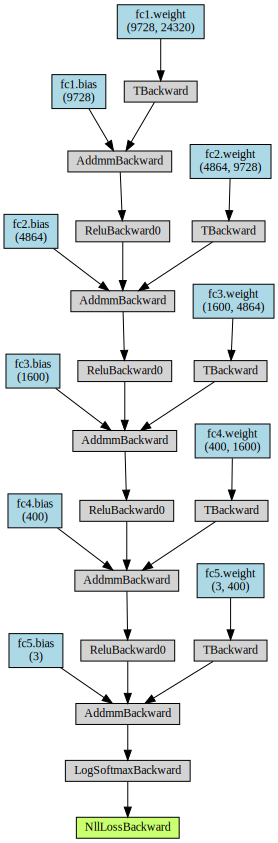

In [17]:
from torchviz import make_dot
make_dot(loss_tensor,params=dict(model_MLP.named_parameters()))

Before we calculate the gradients - let's check what they are now...

In [18]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, gradient: {}".
          format(name, param.grad))

name of a parameter: fc1.weight, gradient: None
name of a parameter: fc1.bias, gradient: None
name of a parameter: fc2.weight, gradient: None
name of a parameter: fc2.bias, gradient: None
name of a parameter: fc3.weight, gradient: None
name of a parameter: fc3.bias, gradient: None
name of a parameter: fc4.weight, gradient: None
name of a parameter: fc4.bias, gradient: None
name of a parameter: fc5.weight, gradient: None
name of a parameter: fc5.bias, gradient: None


No wonder - let's calculate them

In [19]:
loss_tensor.backward()

In [20]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, gradient: {}".
          format(name, param.grad))

name of a parameter: fc1.weight, gradient: tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0055,  0.0044, -0.0054],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0409, -0.0199,  0.0401],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, -0.0029,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0039,  0.0345,  0.0039]])
name of a parameter: fc1.bias, gradient: tensor([ 2.6057e-05, -7.5540e-06,  6.1005e-05,  ...,  1.4483e-05,
        -4.8968e-05,  7.1884e-05])
name of a parameter: fc2.weight, gradient: tensor([[ 2.7384e-02, -4.8617e-03,  3.1459e-02,  ...,  1.2708e-02,
          2.4797e-02, -1.6734e-03],
        [ 4.9160e-02,  2.5670e-03,  5.5425e-02,  ..., -2.2134e-04,
          8.3539e-02,  3.2531e-02],
        [ 2.3428e-04,  4.6425e-03,  2.1860e-03,  ...,  0.0000e+00,
          4.0607e-03,  9.6140e-04],
        ...,
        [-1.5499

All we have to do now is subtract the gradient of a given parameter from the parameter tensor itself and do it for all parameters of the model - that should decrease the loss. Normally the gradient is multiplied by a learning rate parameter $\lambda$ so we don't go too far in the loss landscape

In [21]:
lr=0.0001
for param in model_MLP.parameters():
    param.data.add_(-lr*param.grad.data)

call to backward **accumulates** gradients - so we also need to zero the gradient tensors if we want to keep going

In [22]:
for param in model_MLP.parameters():
    param.grad.data.zero_()

There is a much simpler way of doing this - we can use the pytorch [optim](https://pytorch.org/docs/stable/optim.html) classes. This allows us to easily use more advanced optimization options (like momentum or adaptive optimizers like [Adam](https://arxiv.org/abs/1412.6980)):

In [23]:
from torch import optim
optimizer = optim.SGD(model_MLP.parameters(), lr=0.0001)

Lets get a new batch of events

In [24]:
batch1=next(train_iter)

In [25]:
data=batch1[0]
labels=batch1[1]

In [26]:
model_out=model_MLP(data)
loss_tensor=loss_module(model_out,labels)
loss_tensor.backward()
optimizer.step()

We could just put the code above in a loop and be done with it, but the usual practice would be to wrap this functionality in a training object. Here we'll use the [engine](/edit/utils/engine.py) class. Let's examine it. We'll talk about:
  1. Implementation of the training loop
  2. Evaluation on validation set and training and test modes.
  3. Turning evaluation of gradients on and off.
  4. Saving and retrieving the model and optimizer state.

In [27]:
from utils.engine import Engine

Let's first create a configuration object -we'll use this to set up our training engine

In [28]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1024
config.batch_size_train = 32
config.batch_size_val = 2048
config.lr=0.001
config.device = 'gpu'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2
config.dump_path = '../model_state_dumps'


In [29]:
engine=Engine(model_MLP,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190823_180601/


In [30]:
print(vars(config))

{'batch_size_test': 1024, 'batch_size_train': 32, 'batch_size_val': 2048, 'lr': 0.001, 'device': 'gpu', 'num_workers_train': 3, 'num_workers_val': 2, 'num_workers_test': 2, 'dump_path': '../model_state_dumps'}


In [31]:
%%time
engine.train(epochs=2.5,report_interval=10,valid_interval=100)

Epoch 0 Starting @ 2019-08-23 18:06:01
... Iteration 0 ... Epoch 0.00 ... Validation Loss 6.639 ... Validation Accuracy 0.347
Saved checkpoint as: ../model_state_dumps/20190823_180601/SimpleMLP.pth
best validation loss so far!: 6.63944673538208
Saved checkpoint as: ../model_state_dumps/20190823_180601/SimpleMLPBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 7.393 ... Accuracy 0.219
... Iteration 11 ... Epoch 0.01 ... Loss 1.087 ... Accuracy 0.344
... Iteration 21 ... Epoch 0.02 ... Loss 1.005 ... Accuracy 0.406
... Iteration 31 ... Epoch 0.02 ... Loss 1.049 ... Accuracy 0.500
... Iteration 41 ... Epoch 0.03 ... Loss 1.080 ... Accuracy 0.531
... Iteration 51 ... Epoch 0.04 ... Loss 1.022 ... Accuracy 0.469
... Iteration 61 ... Epoch 0.05 ... Loss 0.956 ... Accuracy 0.594
... Iteration 71 ... Epoch 0.06 ... Loss 1.055 ... Accuracy 0.375
... Iteration 81 ... Epoch 0.06 ... Loss 0.935 ... Accuracy 0.531
... Iteration 91 ... Epoch 0.07 ... Loss 0.889 ... Accuracy 0.562
... Iteration 100 ..

... Iteration 871 ... Epoch 0.70 ... Loss 0.473 ... Accuracy 0.688
... Iteration 881 ... Epoch 0.70 ... Loss 0.367 ... Accuracy 0.844
... Iteration 891 ... Epoch 0.71 ... Loss 0.576 ... Accuracy 0.688
starting over on the validation set
... Iteration 900 ... Epoch 0.72 ... Validation Loss 0.476 ... Validation Accuracy 0.719
Saved checkpoint as: ../model_state_dumps/20190823_180601/SimpleMLP.pth
... Iteration 901 ... Epoch 0.72 ... Loss 0.556 ... Accuracy 0.656
... Iteration 911 ... Epoch 0.73 ... Loss 0.510 ... Accuracy 0.719
... Iteration 921 ... Epoch 0.74 ... Loss 0.680 ... Accuracy 0.656
... Iteration 931 ... Epoch 0.74 ... Loss 0.633 ... Accuracy 0.656
... Iteration 941 ... Epoch 0.75 ... Loss 0.350 ... Accuracy 0.875
... Iteration 951 ... Epoch 0.76 ... Loss 0.491 ... Accuracy 0.719
... Iteration 961 ... Epoch 0.77 ... Loss 0.472 ... Accuracy 0.781
... Iteration 971 ... Epoch 0.78 ... Loss 0.468 ... Accuracy 0.625
... Iteration 981 ... Epoch 0.78 ... Loss 0.429 ... Accuracy 0.781

... Iteration 1781 ... Epoch 1.42 ... Loss 0.399 ... Accuracy 0.844
... Iteration 1791 ... Epoch 1.43 ... Loss 0.220 ... Accuracy 0.875
... Iteration 1801 ... Epoch 1.44 ... Loss 0.353 ... Accuracy 0.812
... Iteration 1811 ... Epoch 1.45 ... Loss 0.405 ... Accuracy 0.781
... Iteration 1821 ... Epoch 1.46 ... Loss 0.419 ... Accuracy 0.719
... Iteration 1831 ... Epoch 1.46 ... Loss 0.269 ... Accuracy 0.812
... Iteration 1841 ... Epoch 1.47 ... Loss 0.255 ... Accuracy 0.844
... Iteration 1850 ... Epoch 1.48 ... Validation Loss 0.480 ... Validation Accuracy 0.736
Saved checkpoint as: ../model_state_dumps/20190823_180601/SimpleMLP.pth
... Iteration 1851 ... Epoch 1.48 ... Loss 0.304 ... Accuracy 0.875
... Iteration 1861 ... Epoch 1.49 ... Loss 0.324 ... Accuracy 0.812
... Iteration 1871 ... Epoch 1.50 ... Loss 0.368 ... Accuracy 0.781
... Iteration 1881 ... Epoch 1.50 ... Loss 0.445 ... Accuracy 0.812
... Iteration 1891 ... Epoch 1.51 ... Loss 0.370 ... Accuracy 0.812
... Iteration 1901 ...

... Iteration 2711 ... Epoch 2.17 ... Loss 0.300 ... Accuracy 0.875
... Iteration 2721 ... Epoch 2.18 ... Loss 0.381 ... Accuracy 0.844
... Iteration 2731 ... Epoch 2.18 ... Loss 0.374 ... Accuracy 0.812
... Iteration 2741 ... Epoch 2.19 ... Loss 0.424 ... Accuracy 0.844
... Iteration 2751 ... Epoch 2.20 ... Loss 0.342 ... Accuracy 0.844
... Iteration 2761 ... Epoch 2.21 ... Loss 0.327 ... Accuracy 0.781
... Iteration 2771 ... Epoch 2.22 ... Loss 0.250 ... Accuracy 0.906
... Iteration 2781 ... Epoch 2.22 ... Loss 0.273 ... Accuracy 0.906
... Iteration 2791 ... Epoch 2.23 ... Loss 0.193 ... Accuracy 0.938
... Iteration 2800 ... Epoch 2.24 ... Validation Loss 0.524 ... Validation Accuracy 0.741
Saved checkpoint as: ../model_state_dumps/20190823_180601/SimpleMLP.pth
... Iteration 2801 ... Epoch 2.24 ... Loss 0.323 ... Accuracy 0.812
... Iteration 2811 ... Epoch 2.25 ... Loss 0.250 ... Accuracy 0.938
... Iteration 2821 ... Epoch 2.26 ... Loss 0.276 ... Accuracy 0.875
... Iteration 2831 ...

## Defining a simple Convolutional Network

Let's open [simpleCNN](http://localhost:8888/edit/models/simpleCNN.py)

In [32]:
from models.simpleCNN import SimpleCNN
model_CNN=SimpleCNN(num_input_channels=38,num_classes=3)

In [33]:
import numpy as np
def rotate_chan(x):
    return np.transpose(x,(2,0,1))

In [34]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",val_split=0.1,test_split=0.1,transform=rotate_chan)

In [35]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190823_182023/


In [36]:
for name, param in model_CNN.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: f_embed.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_embed.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv1.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv1.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2a.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2a.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2b.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2b.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv3a.weight, type: 

In [ ]:
%%time
engine.train(epochs=5,report_interval=10,valid_interval=100)

Epoch 0 Starting @ 2019-08-23 18:20:23
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.092 ... Validation Accuracy 0.345
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
best validation loss so far!: 1.0922976732254028
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNNBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 1.096 ... Accuracy 0.344
... Iteration 11 ... Epoch 0.00 ... Loss 1.079 ... Accuracy 0.438
... Iteration 21 ... Epoch 0.00 ... Loss 1.098 ... Accuracy 0.281
... Iteration 31 ... Epoch 0.00 ... Loss 1.109 ... Accuracy 0.156
... Iteration 41 ... Epoch 0.00 ... Loss 1.096 ... Accuracy 0.250
... Iteration 51 ... Epoch 0.00 ... Loss 1.095 ... Accuracy 0.281
... Iteration 61 ... Epoch 0.00 ... Loss 1.091 ... Accuracy 0.188
... Iteration 71 ... Epoch 0.00 ... Loss 1.099 ... Accuracy 0.281
... Iteration 81 ... Epoch 0.00 ... Loss 1.100 ... Accuracy 0.312
... Iteration 91 ... Epoch 0.00 ... Loss 1.057 ... Accuracy 0.500
... Iteration 100 

... Iteration 861 ... Epoch 0.04 ... Loss 0.423 ... Accuracy 0.844
... Iteration 871 ... Epoch 0.04 ... Loss 0.525 ... Accuracy 0.750
... Iteration 881 ... Epoch 0.04 ... Loss 0.491 ... Accuracy 0.750
... Iteration 891 ... Epoch 0.04 ... Loss 0.477 ... Accuracy 0.781
... Iteration 900 ... Epoch 0.04 ... Validation Loss 0.538 ... Validation Accuracy 0.669
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
best validation loss so far!: 0.5380308032035828
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNNBEST.pth
... Iteration 901 ... Epoch 0.04 ... Loss 0.581 ... Accuracy 0.719
... Iteration 911 ... Epoch 0.04 ... Loss 0.471 ... Accuracy 0.656
... Iteration 921 ... Epoch 0.04 ... Loss 0.556 ... Accuracy 0.656
... Iteration 931 ... Epoch 0.04 ... Loss 0.556 ... Accuracy 0.812
... Iteration 941 ... Epoch 0.04 ... Loss 0.437 ... Accuracy 0.844
... Iteration 951 ... Epoch 0.04 ... Loss 0.494 ... Accuracy 0.625
... Iteration 961 ... Epoch 0.04 ... Loss 0.

... Iteration 1771 ... Epoch 0.08 ... Loss 0.478 ... Accuracy 0.750
... Iteration 1781 ... Epoch 0.08 ... Loss 0.615 ... Accuracy 0.656
... Iteration 1791 ... Epoch 0.08 ... Loss 0.483 ... Accuracy 0.750
... Iteration 1800 ... Epoch 0.08 ... Validation Loss 0.447 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
best validation loss so far!: 0.4465767443180084
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNNBEST.pth
... Iteration 1801 ... Epoch 0.08 ... Loss 0.396 ... Accuracy 0.812
... Iteration 1811 ... Epoch 0.08 ... Loss 0.558 ... Accuracy 0.656
... Iteration 1821 ... Epoch 0.08 ... Loss 0.537 ... Accuracy 0.719
... Iteration 1831 ... Epoch 0.08 ... Loss 0.561 ... Accuracy 0.656
... Iteration 1841 ... Epoch 0.08 ... Loss 0.440 ... Accuracy 0.625
... Iteration 1851 ... Epoch 0.08 ... Loss 0.483 ... Accuracy 0.719
... Iteration 1861 ... Epoch 0.08 ... Loss 0.508 ... Accuracy 0.750
... Iteration 1871 ... Epoch 0.08

... Iteration 2711 ... Epoch 0.12 ... Loss 0.518 ... Accuracy 0.656
... Iteration 2721 ... Epoch 0.12 ... Loss 0.560 ... Accuracy 0.625
... Iteration 2731 ... Epoch 0.12 ... Loss 0.253 ... Accuracy 0.938
... Iteration 2741 ... Epoch 0.12 ... Loss 0.367 ... Accuracy 0.812
... Iteration 2751 ... Epoch 0.12 ... Loss 0.554 ... Accuracy 0.656
... Iteration 2761 ... Epoch 0.12 ... Loss 0.550 ... Accuracy 0.656
... Iteration 2771 ... Epoch 0.12 ... Loss 0.437 ... Accuracy 0.750
... Iteration 2781 ... Epoch 0.12 ... Loss 0.704 ... Accuracy 0.656
... Iteration 2791 ... Epoch 0.12 ... Loss 0.332 ... Accuracy 0.844
... Iteration 2800 ... Epoch 0.12 ... Validation Loss 0.445 ... Validation Accuracy 0.750
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 2801 ... Epoch 0.12 ... Loss 0.521 ... Accuracy 0.750
... Iteration 2811 ... Epoch 0.12 ... Loss 0.564 ... Accuracy 0.688
... Iteration 2821 ... Epoch 0.13 ... Loss 0.379 ... Accuracy 0.688
... Iteration 2831 ...

... Iteration 3691 ... Epoch 0.16 ... Loss 0.522 ... Accuracy 0.656
... Iteration 3700 ... Epoch 0.16 ... Validation Loss 0.427 ... Validation Accuracy 0.763
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
best validation loss so far!: 0.4273211658000946
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNNBEST.pth
... Iteration 3701 ... Epoch 0.16 ... Loss 0.454 ... Accuracy 0.750
... Iteration 3711 ... Epoch 0.16 ... Loss 0.544 ... Accuracy 0.688
... Iteration 3721 ... Epoch 0.17 ... Loss 0.469 ... Accuracy 0.781
... Iteration 3731 ... Epoch 0.17 ... Loss 0.394 ... Accuracy 0.844
... Iteration 3741 ... Epoch 0.17 ... Loss 0.488 ... Accuracy 0.719
... Iteration 3751 ... Epoch 0.17 ... Loss 0.504 ... Accuracy 0.719
... Iteration 3761 ... Epoch 0.17 ... Loss 0.371 ... Accuracy 0.844
... Iteration 3771 ... Epoch 0.17 ... Loss 0.516 ... Accuracy 0.688
... Iteration 3781 ... Epoch 0.17 ... Loss 0.546 ... Accuracy 0.625
... Iteration 3791 ... Epoch 0.17

... Iteration 4611 ... Epoch 0.20 ... Loss 0.451 ... Accuracy 0.688
... Iteration 4621 ... Epoch 0.21 ... Loss 0.288 ... Accuracy 0.844
... Iteration 4631 ... Epoch 0.21 ... Loss 0.360 ... Accuracy 0.812
... Iteration 4641 ... Epoch 0.21 ... Loss 0.549 ... Accuracy 0.625
... Iteration 4651 ... Epoch 0.21 ... Loss 0.594 ... Accuracy 0.594
... Iteration 4661 ... Epoch 0.21 ... Loss 0.496 ... Accuracy 0.688
... Iteration 4671 ... Epoch 0.21 ... Loss 0.494 ... Accuracy 0.750
... Iteration 4681 ... Epoch 0.21 ... Loss 0.438 ... Accuracy 0.750
... Iteration 4691 ... Epoch 0.21 ... Loss 0.447 ... Accuracy 0.719
... Iteration 4700 ... Epoch 0.21 ... Validation Loss 0.431 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 4701 ... Epoch 0.21 ... Loss 0.481 ... Accuracy 0.750
... Iteration 4711 ... Epoch 0.21 ... Loss 0.452 ... Accuracy 0.688
... Iteration 4721 ... Epoch 0.21 ... Loss 0.585 ... Accuracy 0.594
... Iteration 4731 ...

... Iteration 5611 ... Epoch 0.25 ... Loss 0.455 ... Accuracy 0.781
... Iteration 5621 ... Epoch 0.25 ... Loss 0.430 ... Accuracy 0.750
... Iteration 5631 ... Epoch 0.25 ... Loss 0.488 ... Accuracy 0.781
... Iteration 5641 ... Epoch 0.25 ... Loss 0.378 ... Accuracy 0.844
... Iteration 5651 ... Epoch 0.25 ... Loss 0.576 ... Accuracy 0.781
... Iteration 5661 ... Epoch 0.25 ... Loss 0.538 ... Accuracy 0.750
... Iteration 5671 ... Epoch 0.25 ... Loss 0.482 ... Accuracy 0.719
... Iteration 5681 ... Epoch 0.25 ... Loss 0.353 ... Accuracy 0.875
... Iteration 5691 ... Epoch 0.25 ... Loss 0.426 ... Accuracy 0.812
... Iteration 5700 ... Epoch 0.25 ... Validation Loss 0.435 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 5701 ... Epoch 0.25 ... Loss 0.534 ... Accuracy 0.719
... Iteration 5711 ... Epoch 0.25 ... Loss 0.545 ... Accuracy 0.594
... Iteration 5721 ... Epoch 0.25 ... Loss 0.486 ... Accuracy 0.812
... Iteration 5731 ...

... Iteration 6611 ... Epoch 0.29 ... Loss 0.435 ... Accuracy 0.781
... Iteration 6621 ... Epoch 0.29 ... Loss 0.478 ... Accuracy 0.719
... Iteration 6631 ... Epoch 0.29 ... Loss 0.384 ... Accuracy 0.781
... Iteration 6641 ... Epoch 0.30 ... Loss 0.398 ... Accuracy 0.844
... Iteration 6651 ... Epoch 0.30 ... Loss 0.429 ... Accuracy 0.719
... Iteration 6661 ... Epoch 0.30 ... Loss 0.283 ... Accuracy 0.781
... Iteration 6671 ... Epoch 0.30 ... Loss 0.520 ... Accuracy 0.688
... Iteration 6681 ... Epoch 0.30 ... Loss 0.470 ... Accuracy 0.688
... Iteration 6691 ... Epoch 0.30 ... Loss 0.404 ... Accuracy 0.750
... Iteration 6700 ... Epoch 0.30 ... Validation Loss 0.408 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
best validation loss so far!: 0.40796804428100586
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNNBEST.pth
... Iteration 6701 ... Epoch 0.30 ... Loss 0.465 ... Accuracy 0.688
... Iteration 6711 ... Epoch 0.3

... Iteration 7591 ... Epoch 0.34 ... Loss 0.308 ... Accuracy 0.844
... Iteration 7600 ... Epoch 0.34 ... Validation Loss 0.413 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 7601 ... Epoch 0.34 ... Loss 0.340 ... Accuracy 0.875
... Iteration 7611 ... Epoch 0.34 ... Loss 0.353 ... Accuracy 0.875
... Iteration 7621 ... Epoch 0.34 ... Loss 0.496 ... Accuracy 0.750
... Iteration 7631 ... Epoch 0.34 ... Loss 0.334 ... Accuracy 0.844
... Iteration 7641 ... Epoch 0.34 ... Loss 0.388 ... Accuracy 0.781
... Iteration 7651 ... Epoch 0.34 ... Loss 0.540 ... Accuracy 0.656
... Iteration 7661 ... Epoch 0.34 ... Loss 0.407 ... Accuracy 0.812
... Iteration 7671 ... Epoch 0.34 ... Loss 0.353 ... Accuracy 0.812
... Iteration 7681 ... Epoch 0.34 ... Loss 0.562 ... Accuracy 0.719
... Iteration 7691 ... Epoch 0.34 ... Loss 0.377 ... Accuracy 0.812
... Iteration 7700 ... Epoch 0.34 ... Validation Loss 0.439 ... Validation Accuracy 0.760


... Iteration 8561 ... Epoch 0.38 ... Loss 0.342 ... Accuracy 0.812
... Iteration 8571 ... Epoch 0.38 ... Loss 0.289 ... Accuracy 0.844
... Iteration 8581 ... Epoch 0.38 ... Loss 0.374 ... Accuracy 0.781
... Iteration 8591 ... Epoch 0.38 ... Loss 0.421 ... Accuracy 0.719
... Iteration 8600 ... Epoch 0.38 ... Validation Loss 0.425 ... Validation Accuracy 0.771
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 8601 ... Epoch 0.38 ... Loss 0.461 ... Accuracy 0.719
... Iteration 8611 ... Epoch 0.38 ... Loss 0.393 ... Accuracy 0.781
... Iteration 8621 ... Epoch 0.38 ... Loss 0.472 ... Accuracy 0.688
... Iteration 8631 ... Epoch 0.38 ... Loss 0.481 ... Accuracy 0.625
... Iteration 8641 ... Epoch 0.38 ... Loss 0.523 ... Accuracy 0.625
... Iteration 8651 ... Epoch 0.38 ... Loss 0.378 ... Accuracy 0.781
... Iteration 8661 ... Epoch 0.38 ... Loss 0.403 ... Accuracy 0.781
... Iteration 8671 ... Epoch 0.39 ... Loss 0.322 ... Accuracy 0.750
... Iteration 8681 ...

... Iteration 9511 ... Epoch 0.42 ... Loss 0.392 ... Accuracy 0.781
... Iteration 9521 ... Epoch 0.42 ... Loss 0.423 ... Accuracy 0.812
... Iteration 9531 ... Epoch 0.42 ... Loss 0.570 ... Accuracy 0.688
... Iteration 9541 ... Epoch 0.42 ... Loss 0.400 ... Accuracy 0.844
... Iteration 9551 ... Epoch 0.42 ... Loss 0.420 ... Accuracy 0.844
... Iteration 9561 ... Epoch 0.42 ... Loss 0.549 ... Accuracy 0.688
... Iteration 9571 ... Epoch 0.43 ... Loss 0.486 ... Accuracy 0.719
... Iteration 9581 ... Epoch 0.43 ... Loss 0.485 ... Accuracy 0.719
... Iteration 9591 ... Epoch 0.43 ... Loss 0.447 ... Accuracy 0.719
... Iteration 9600 ... Epoch 0.43 ... Validation Loss 0.430 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 9601 ... Epoch 0.43 ... Loss 0.436 ... Accuracy 0.719
... Iteration 9611 ... Epoch 0.43 ... Loss 0.386 ... Accuracy 0.781
... Iteration 9621 ... Epoch 0.43 ... Loss 0.440 ... Accuracy 0.781
... Iteration 9631 ...

... Iteration 10481 ... Epoch 0.47 ... Loss 0.407 ... Accuracy 0.750
... Iteration 10491 ... Epoch 0.47 ... Loss 0.539 ... Accuracy 0.719
... Iteration 10500 ... Epoch 0.47 ... Validation Loss 0.418 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 10501 ... Epoch 0.47 ... Loss 0.452 ... Accuracy 0.719
... Iteration 10511 ... Epoch 0.47 ... Loss 0.410 ... Accuracy 0.750
... Iteration 10521 ... Epoch 0.47 ... Loss 0.504 ... Accuracy 0.688
... Iteration 10531 ... Epoch 0.47 ... Loss 0.300 ... Accuracy 0.844
... Iteration 10541 ... Epoch 0.47 ... Loss 0.369 ... Accuracy 0.844
... Iteration 10551 ... Epoch 0.47 ... Loss 0.391 ... Accuracy 0.812
... Iteration 10561 ... Epoch 0.47 ... Loss 0.425 ... Accuracy 0.781
... Iteration 10571 ... Epoch 0.47 ... Loss 0.406 ... Accuracy 0.781
... Iteration 10581 ... Epoch 0.47 ... Loss 0.473 ... Accuracy 0.750
... Iteration 10591 ... Epoch 0.47 ... Loss 0.597 ... Accuracy 0.688
... Itera

... Iteration 11441 ... Epoch 0.51 ... Loss 0.339 ... Accuracy 0.906
... Iteration 11451 ... Epoch 0.51 ... Loss 0.406 ... Accuracy 0.750
... Iteration 11461 ... Epoch 0.51 ... Loss 0.385 ... Accuracy 0.688
... Iteration 11471 ... Epoch 0.51 ... Loss 0.489 ... Accuracy 0.750
... Iteration 11481 ... Epoch 0.51 ... Loss 0.330 ... Accuracy 0.844
... Iteration 11491 ... Epoch 0.51 ... Loss 0.463 ... Accuracy 0.750
... Iteration 11500 ... Epoch 0.51 ... Validation Loss 0.436 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 11501 ... Epoch 0.51 ... Loss 0.424 ... Accuracy 0.812
... Iteration 11511 ... Epoch 0.51 ... Loss 0.368 ... Accuracy 0.812
... Iteration 11521 ... Epoch 0.51 ... Loss 0.561 ... Accuracy 0.656
... Iteration 11531 ... Epoch 0.51 ... Loss 0.413 ... Accuracy 0.781
... Iteration 11541 ... Epoch 0.51 ... Loss 0.356 ... Accuracy 0.719
... Iteration 11551 ... Epoch 0.51 ... Loss 0.415 ... Accuracy 0.688
... Itera

... Iteration 12411 ... Epoch 0.55 ... Loss 0.489 ... Accuracy 0.781
... Iteration 12421 ... Epoch 0.55 ... Loss 0.393 ... Accuracy 0.844
... Iteration 12431 ... Epoch 0.55 ... Loss 0.339 ... Accuracy 0.812
... Iteration 12441 ... Epoch 0.55 ... Loss 0.489 ... Accuracy 0.719
... Iteration 12451 ... Epoch 0.55 ... Loss 0.339 ... Accuracy 0.844
... Iteration 12461 ... Epoch 0.55 ... Loss 0.404 ... Accuracy 0.875
... Iteration 12471 ... Epoch 0.55 ... Loss 0.404 ... Accuracy 0.812
... Iteration 12481 ... Epoch 0.55 ... Loss 0.384 ... Accuracy 0.781
... Iteration 12491 ... Epoch 0.56 ... Loss 0.557 ... Accuracy 0.688
... Iteration 12500 ... Epoch 0.56 ... Validation Loss 0.415 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 12501 ... Epoch 0.56 ... Loss 0.506 ... Accuracy 0.750
... Iteration 12511 ... Epoch 0.56 ... Loss 0.401 ... Accuracy 0.750
... Iteration 12521 ... Epoch 0.56 ... Loss 0.470 ... Accuracy 0.719
... Itera

... Iteration 13351 ... Epoch 0.59 ... Loss 0.415 ... Accuracy 0.719
... Iteration 13361 ... Epoch 0.59 ... Loss 0.420 ... Accuracy 0.688
... Iteration 13371 ... Epoch 0.59 ... Loss 0.408 ... Accuracy 0.844
... Iteration 13381 ... Epoch 0.59 ... Loss 0.400 ... Accuracy 0.812
... Iteration 13391 ... Epoch 0.60 ... Loss 0.380 ... Accuracy 0.781
... Iteration 13400 ... Epoch 0.60 ... Validation Loss 0.411 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 13401 ... Epoch 0.60 ... Loss 0.318 ... Accuracy 0.906
... Iteration 13411 ... Epoch 0.60 ... Loss 0.409 ... Accuracy 0.750
... Iteration 13421 ... Epoch 0.60 ... Loss 0.444 ... Accuracy 0.688
... Iteration 13431 ... Epoch 0.60 ... Loss 0.508 ... Accuracy 0.656
... Iteration 13441 ... Epoch 0.60 ... Loss 0.420 ... Accuracy 0.812
... Iteration 13451 ... Epoch 0.60 ... Loss 0.520 ... Accuracy 0.719
... Iteration 13461 ... Epoch 0.60 ... Loss 0.502 ... Accuracy 0.719
... Itera

... Iteration 14311 ... Epoch 0.64 ... Loss 0.247 ... Accuracy 0.938
... Iteration 14321 ... Epoch 0.64 ... Loss 0.446 ... Accuracy 0.781
... Iteration 14331 ... Epoch 0.64 ... Loss 0.594 ... Accuracy 0.656
... Iteration 14341 ... Epoch 0.64 ... Loss 0.399 ... Accuracy 0.812
... Iteration 14351 ... Epoch 0.64 ... Loss 0.424 ... Accuracy 0.688
... Iteration 14361 ... Epoch 0.64 ... Loss 0.416 ... Accuracy 0.781
... Iteration 14371 ... Epoch 0.64 ... Loss 0.602 ... Accuracy 0.781
... Iteration 14381 ... Epoch 0.64 ... Loss 0.464 ... Accuracy 0.781
... Iteration 14391 ... Epoch 0.64 ... Loss 0.409 ... Accuracy 0.781
... Iteration 14400 ... Epoch 0.64 ... Validation Loss 0.419 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 14401 ... Epoch 0.64 ... Loss 0.398 ... Accuracy 0.781
... Iteration 14411 ... Epoch 0.64 ... Loss 0.582 ... Accuracy 0.625
... Iteration 14421 ... Epoch 0.64 ... Loss 0.482 ... Accuracy 0.750
... Itera

... Iteration 15291 ... Epoch 0.68 ... Loss 0.391 ... Accuracy 0.750
... Iteration 15300 ... Epoch 0.68 ... Validation Loss 0.428 ... Validation Accuracy 0.761
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 15301 ... Epoch 0.68 ... Loss 0.491 ... Accuracy 0.688
... Iteration 15311 ... Epoch 0.68 ... Loss 0.487 ... Accuracy 0.781
... Iteration 15321 ... Epoch 0.68 ... Loss 0.335 ... Accuracy 0.844
... Iteration 15331 ... Epoch 0.68 ... Loss 0.506 ... Accuracy 0.750
... Iteration 15341 ... Epoch 0.68 ... Loss 0.291 ... Accuracy 0.844
... Iteration 15351 ... Epoch 0.68 ... Loss 0.428 ... Accuracy 0.812
... Iteration 15361 ... Epoch 0.68 ... Loss 0.446 ... Accuracy 0.688
... Iteration 15371 ... Epoch 0.68 ... Loss 0.398 ... Accuracy 0.812
... Iteration 15381 ... Epoch 0.68 ... Loss 0.496 ... Accuracy 0.719
... Iteration 15391 ... Epoch 0.68 ... Loss 0.453 ... Accuracy 0.688
... Iteration 15400 ... Epoch 0.68 ... Validation Loss 0.426 ... Validation Ac

... Iteration 16231 ... Epoch 0.72 ... Loss 0.493 ... Accuracy 0.688
... Iteration 16241 ... Epoch 0.72 ... Loss 0.378 ... Accuracy 0.844
... Iteration 16251 ... Epoch 0.72 ... Loss 0.412 ... Accuracy 0.781
... Iteration 16261 ... Epoch 0.72 ... Loss 0.463 ... Accuracy 0.750
... Iteration 16271 ... Epoch 0.72 ... Loss 0.340 ... Accuracy 0.844
... Iteration 16281 ... Epoch 0.72 ... Loss 0.507 ... Accuracy 0.688
... Iteration 16291 ... Epoch 0.72 ... Loss 0.515 ... Accuracy 0.750
... Iteration 16300 ... Epoch 0.72 ... Validation Loss 0.409 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 16301 ... Epoch 0.72 ... Loss 0.320 ... Accuracy 0.812
... Iteration 16311 ... Epoch 0.72 ... Loss 0.347 ... Accuracy 0.844
... Iteration 16321 ... Epoch 0.73 ... Loss 0.434 ... Accuracy 0.719
... Iteration 16331 ... Epoch 0.73 ... Loss 0.448 ... Accuracy 0.781
... Iteration 16341 ... Epoch 0.73 ... Loss 0.505 ... Accuracy 0.688
... Itera

... Iteration 17211 ... Epoch 0.76 ... Loss 0.374 ... Accuracy 0.844
... Iteration 17221 ... Epoch 0.77 ... Loss 0.397 ... Accuracy 0.844
... Iteration 17231 ... Epoch 0.77 ... Loss 0.340 ... Accuracy 0.812
... Iteration 17241 ... Epoch 0.77 ... Loss 0.361 ... Accuracy 0.750
... Iteration 17251 ... Epoch 0.77 ... Loss 0.350 ... Accuracy 0.781
... Iteration 17261 ... Epoch 0.77 ... Loss 0.385 ... Accuracy 0.812
... Iteration 17271 ... Epoch 0.77 ... Loss 0.618 ... Accuracy 0.594
... Iteration 17281 ... Epoch 0.77 ... Loss 0.429 ... Accuracy 0.750
... Iteration 17291 ... Epoch 0.77 ... Loss 0.441 ... Accuracy 0.719
... Iteration 17300 ... Epoch 0.77 ... Validation Loss 0.414 ... Validation Accuracy 0.771
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 17301 ... Epoch 0.77 ... Loss 0.475 ... Accuracy 0.688
... Iteration 17311 ... Epoch 0.77 ... Loss 0.379 ... Accuracy 0.844
... Iteration 17321 ... Epoch 0.77 ... Loss 0.348 ... Accuracy 0.844
... Itera

... Iteration 18181 ... Epoch 0.81 ... Loss 0.474 ... Accuracy 0.656
... Iteration 18191 ... Epoch 0.81 ... Loss 0.398 ... Accuracy 0.781
... Iteration 18200 ... Epoch 0.81 ... Validation Loss 0.430 ... Validation Accuracy 0.762
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 18201 ... Epoch 0.81 ... Loss 0.298 ... Accuracy 0.844
... Iteration 18211 ... Epoch 0.81 ... Loss 0.267 ... Accuracy 0.906
... Iteration 18221 ... Epoch 0.81 ... Loss 0.376 ... Accuracy 0.812
... Iteration 18231 ... Epoch 0.81 ... Loss 0.429 ... Accuracy 0.812
... Iteration 18241 ... Epoch 0.81 ... Loss 0.409 ... Accuracy 0.719
... Iteration 18251 ... Epoch 0.81 ... Loss 0.536 ... Accuracy 0.719
... Iteration 18261 ... Epoch 0.81 ... Loss 0.345 ... Accuracy 0.812
... Iteration 18271 ... Epoch 0.81 ... Loss 0.359 ... Accuracy 0.812
... Iteration 18281 ... Epoch 0.81 ... Loss 0.439 ... Accuracy 0.781
... Iteration 18291 ... Epoch 0.81 ... Loss 0.386 ... Accuracy 0.781
... Itera

... Iteration 19141 ... Epoch 0.85 ... Loss 0.603 ... Accuracy 0.688
... Iteration 19151 ... Epoch 0.85 ... Loss 0.533 ... Accuracy 0.688
... Iteration 19161 ... Epoch 0.85 ... Loss 0.412 ... Accuracy 0.750
... Iteration 19171 ... Epoch 0.85 ... Loss 0.309 ... Accuracy 0.844
... Iteration 19181 ... Epoch 0.85 ... Loss 0.329 ... Accuracy 0.812
... Iteration 19191 ... Epoch 0.85 ... Loss 0.555 ... Accuracy 0.719
... Iteration 19200 ... Epoch 0.85 ... Validation Loss 0.409 ... Validation Accuracy 0.784
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 19201 ... Epoch 0.85 ... Loss 0.492 ... Accuracy 0.719
... Iteration 19211 ... Epoch 0.85 ... Loss 0.485 ... Accuracy 0.688
... Iteration 19221 ... Epoch 0.85 ... Loss 0.494 ... Accuracy 0.688
... Iteration 19231 ... Epoch 0.85 ... Loss 0.426 ... Accuracy 0.844
... Iteration 19241 ... Epoch 0.86 ... Loss 0.241 ... Accuracy 0.938
... Iteration 19251 ... Epoch 0.86 ... Loss 0.458 ... Accuracy 0.781
... Itera

... Iteration 20111 ... Epoch 0.89 ... Loss 0.476 ... Accuracy 0.781
... Iteration 20121 ... Epoch 0.89 ... Loss 0.379 ... Accuracy 0.750
... Iteration 20131 ... Epoch 0.89 ... Loss 0.407 ... Accuracy 0.812
... Iteration 20141 ... Epoch 0.90 ... Loss 0.293 ... Accuracy 0.906
... Iteration 20151 ... Epoch 0.90 ... Loss 0.285 ... Accuracy 0.875
... Iteration 20161 ... Epoch 0.90 ... Loss 0.458 ... Accuracy 0.781
... Iteration 20171 ... Epoch 0.90 ... Loss 0.437 ... Accuracy 0.750
... Iteration 20181 ... Epoch 0.90 ... Loss 0.397 ... Accuracy 0.812
... Iteration 20191 ... Epoch 0.90 ... Loss 0.443 ... Accuracy 0.781
... Iteration 20200 ... Epoch 0.90 ... Validation Loss 0.424 ... Validation Accuracy 0.773
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 20201 ... Epoch 0.90 ... Loss 0.399 ... Accuracy 0.781
... Iteration 20211 ... Epoch 0.90 ... Loss 0.518 ... Accuracy 0.688
... Iteration 20221 ... Epoch 0.90 ... Loss 0.376 ... Accuracy 0.750
... Itera

... Iteration 21091 ... Epoch 0.94 ... Loss 0.343 ... Accuracy 0.844
... Iteration 21100 ... Epoch 0.94 ... Validation Loss 0.450 ... Validation Accuracy 0.753
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 21101 ... Epoch 0.94 ... Loss 0.405 ... Accuracy 0.812
... Iteration 21111 ... Epoch 0.94 ... Loss 0.384 ... Accuracy 0.812
... Iteration 21121 ... Epoch 0.94 ... Loss 0.375 ... Accuracy 0.812
... Iteration 21131 ... Epoch 0.94 ... Loss 0.416 ... Accuracy 0.781
... Iteration 21141 ... Epoch 0.94 ... Loss 0.463 ... Accuracy 0.719
... Iteration 21151 ... Epoch 0.94 ... Loss 0.356 ... Accuracy 0.844
... Iteration 21161 ... Epoch 0.94 ... Loss 0.313 ... Accuracy 0.906
... Iteration 21171 ... Epoch 0.94 ... Loss 0.535 ... Accuracy 0.625
... Iteration 21181 ... Epoch 0.94 ... Loss 0.228 ... Accuracy 0.906
... Iteration 21191 ... Epoch 0.94 ... Loss 0.376 ... Accuracy 0.812
... Iteration 21200 ... Epoch 0.94 ... Validation Loss 0.401 ... Validation Ac

... Iteration 22041 ... Epoch 0.98 ... Loss 0.414 ... Accuracy 0.844
... Iteration 22051 ... Epoch 0.98 ... Loss 0.506 ... Accuracy 0.750
... Iteration 22061 ... Epoch 0.98 ... Loss 0.484 ... Accuracy 0.719
... Iteration 22071 ... Epoch 0.98 ... Loss 0.466 ... Accuracy 0.781
... Iteration 22081 ... Epoch 0.98 ... Loss 0.445 ... Accuracy 0.750
... Iteration 22091 ... Epoch 0.98 ... Loss 0.403 ... Accuracy 0.750
... Iteration 22100 ... Epoch 0.98 ... Validation Loss 0.411 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 22101 ... Epoch 0.98 ... Loss 0.388 ... Accuracy 0.781
... Iteration 22111 ... Epoch 0.98 ... Loss 0.318 ... Accuracy 0.969
... Iteration 22121 ... Epoch 0.98 ... Loss 0.415 ... Accuracy 0.781
... Iteration 22131 ... Epoch 0.98 ... Loss 0.488 ... Accuracy 0.688
... Iteration 22141 ... Epoch 0.98 ... Loss 0.302 ... Accuracy 0.812
... Iteration 22151 ... Epoch 0.98 ... Loss 0.284 ... Accuracy 0.875
... Itera

... Iteration 23011 ... Epoch 1.02 ... Loss 0.335 ... Accuracy 0.812
... Iteration 23021 ... Epoch 1.02 ... Loss 0.331 ... Accuracy 0.812
... Iteration 23031 ... Epoch 1.02 ... Loss 0.565 ... Accuracy 0.531
... Iteration 23041 ... Epoch 1.02 ... Loss 0.369 ... Accuracy 0.750
... Iteration 23051 ... Epoch 1.02 ... Loss 0.403 ... Accuracy 0.781
... Iteration 23061 ... Epoch 1.02 ... Loss 0.388 ... Accuracy 0.844
... Iteration 23071 ... Epoch 1.03 ... Loss 0.415 ... Accuracy 0.719
... Iteration 23081 ... Epoch 1.03 ... Loss 0.424 ... Accuracy 0.750
... Iteration 23091 ... Epoch 1.03 ... Loss 0.409 ... Accuracy 0.781
... Iteration 23100 ... Epoch 1.03 ... Validation Loss 0.406 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 23101 ... Epoch 1.03 ... Loss 0.432 ... Accuracy 0.688
... Iteration 23111 ... Epoch 1.03 ... Loss 0.528 ... Accuracy 0.594
... Iteration 23121 ... Epoch 1.03 ... Loss 0.388 ... Accuracy 0.750
... Itera

... Iteration 23991 ... Epoch 1.07 ... Loss 0.441 ... Accuracy 0.750
... Iteration 24000 ... Epoch 1.07 ... Validation Loss 0.398 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 24001 ... Epoch 1.07 ... Loss 0.448 ... Accuracy 0.719
... Iteration 24011 ... Epoch 1.07 ... Loss 0.323 ... Accuracy 0.938
... Iteration 24021 ... Epoch 1.07 ... Loss 0.342 ... Accuracy 0.781
... Iteration 24031 ... Epoch 1.07 ... Loss 0.271 ... Accuracy 0.844
... Iteration 24041 ... Epoch 1.07 ... Loss 0.254 ... Accuracy 0.906
... Iteration 24051 ... Epoch 1.07 ... Loss 0.336 ... Accuracy 0.844
... Iteration 24061 ... Epoch 1.07 ... Loss 0.327 ... Accuracy 0.812
... Iteration 24071 ... Epoch 1.07 ... Loss 0.543 ... Accuracy 0.656
... Iteration 24081 ... Epoch 1.07 ... Loss 0.522 ... Accuracy 0.594
... Iteration 24091 ... Epoch 1.07 ... Loss 0.332 ... Accuracy 0.844
... Iteration 24100 ... Epoch 1.07 ... Validation Loss 0.417 ... Validation Ac

... Iteration 24951 ... Epoch 1.11 ... Loss 0.441 ... Accuracy 0.844
... Iteration 24961 ... Epoch 1.11 ... Loss 0.474 ... Accuracy 0.719
... Iteration 24971 ... Epoch 1.11 ... Loss 0.496 ... Accuracy 0.750
... Iteration 24981 ... Epoch 1.11 ... Loss 0.440 ... Accuracy 0.781
... Iteration 24991 ... Epoch 1.11 ... Loss 0.254 ... Accuracy 0.906
... Iteration 25000 ... Epoch 1.11 ... Validation Loss 0.412 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 25001 ... Epoch 1.11 ... Loss 0.326 ... Accuracy 0.906
... Iteration 25011 ... Epoch 1.11 ... Loss 0.483 ... Accuracy 0.844
... Iteration 25021 ... Epoch 1.11 ... Loss 0.516 ... Accuracy 0.750
... Iteration 25031 ... Epoch 1.11 ... Loss 0.476 ... Accuracy 0.781
... Iteration 25041 ... Epoch 1.11 ... Loss 0.511 ... Accuracy 0.719
... Iteration 25051 ... Epoch 1.11 ... Loss 0.345 ... Accuracy 0.781
... Iteration 25061 ... Epoch 1.11 ... Loss 0.380 ... Accuracy 0.781
... Itera

... Iteration 25911 ... Epoch 1.15 ... Loss 0.482 ... Accuracy 0.625
... Iteration 25921 ... Epoch 1.15 ... Loss 0.506 ... Accuracy 0.781
... Iteration 25931 ... Epoch 1.15 ... Loss 0.318 ... Accuracy 0.875
... Iteration 25941 ... Epoch 1.15 ... Loss 0.334 ... Accuracy 0.812
... Iteration 25951 ... Epoch 1.15 ... Loss 0.419 ... Accuracy 0.750
... Iteration 25961 ... Epoch 1.15 ... Loss 0.401 ... Accuracy 0.781
... Iteration 25971 ... Epoch 1.15 ... Loss 0.495 ... Accuracy 0.844
... Iteration 25981 ... Epoch 1.15 ... Loss 0.419 ... Accuracy 0.781
... Iteration 25991 ... Epoch 1.16 ... Loss 0.405 ... Accuracy 0.781
... Iteration 26000 ... Epoch 1.16 ... Validation Loss 0.416 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 26001 ... Epoch 1.16 ... Loss 0.334 ... Accuracy 0.812
... Iteration 26011 ... Epoch 1.16 ... Loss 0.398 ... Accuracy 0.875
... Iteration 26021 ... Epoch 1.16 ... Loss 0.464 ... Accuracy 0.781
... Itera

... Iteration 26881 ... Epoch 1.19 ... Loss 0.445 ... Accuracy 0.812
... Iteration 26891 ... Epoch 1.20 ... Loss 0.387 ... Accuracy 0.906
... Iteration 26900 ... Epoch 1.20 ... Validation Loss 0.419 ... Validation Accuracy 0.772
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 26901 ... Epoch 1.20 ... Loss 0.364 ... Accuracy 0.844
... Iteration 26911 ... Epoch 1.20 ... Loss 0.545 ... Accuracy 0.719
... Iteration 26921 ... Epoch 1.20 ... Loss 0.447 ... Accuracy 0.750
... Iteration 26931 ... Epoch 1.20 ... Loss 0.366 ... Accuracy 0.844
... Iteration 26941 ... Epoch 1.20 ... Loss 0.376 ... Accuracy 0.781
... Iteration 26951 ... Epoch 1.20 ... Loss 0.455 ... Accuracy 0.750
... Iteration 26961 ... Epoch 1.20 ... Loss 0.522 ... Accuracy 0.688
... Iteration 26971 ... Epoch 1.20 ... Loss 0.365 ... Accuracy 0.844
... Iteration 26981 ... Epoch 1.20 ... Loss 0.397 ... Accuracy 0.750
... Iteration 26991 ... Epoch 1.20 ... Loss 0.431 ... Accuracy 0.750
... Itera

... Iteration 27821 ... Epoch 1.24 ... Loss 0.458 ... Accuracy 0.688
... Iteration 27831 ... Epoch 1.24 ... Loss 0.332 ... Accuracy 0.812
... Iteration 27841 ... Epoch 1.24 ... Loss 0.447 ... Accuracy 0.719
... Iteration 27851 ... Epoch 1.24 ... Loss 0.380 ... Accuracy 0.812
... Iteration 27861 ... Epoch 1.24 ... Loss 0.571 ... Accuracy 0.688
... Iteration 27871 ... Epoch 1.24 ... Loss 0.393 ... Accuracy 0.844
... Iteration 27881 ... Epoch 1.24 ... Loss 0.369 ... Accuracy 0.781
... Iteration 27891 ... Epoch 1.24 ... Loss 0.428 ... Accuracy 0.781
... Iteration 27900 ... Epoch 1.24 ... Validation Loss 0.418 ... Validation Accuracy 0.772
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 27901 ... Epoch 1.24 ... Loss 0.485 ... Accuracy 0.781
... Iteration 27911 ... Epoch 1.24 ... Loss 0.255 ... Accuracy 0.906
... Iteration 27921 ... Epoch 1.24 ... Loss 0.375 ... Accuracy 0.844
... Iteration 27931 ... Epoch 1.24 ... Loss 0.411 ... Accuracy 0.750
... Itera

... Iteration 28800 ... Epoch 1.28 ... Validation Loss 0.393 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 28801 ... Epoch 1.28 ... Loss 0.292 ... Accuracy 0.938
... Iteration 28811 ... Epoch 1.28 ... Loss 0.380 ... Accuracy 0.812
... Iteration 28821 ... Epoch 1.28 ... Loss 0.397 ... Accuracy 0.812
... Iteration 28831 ... Epoch 1.28 ... Loss 0.410 ... Accuracy 0.750
... Iteration 28841 ... Epoch 1.28 ... Loss 0.428 ... Accuracy 0.719
... Iteration 28851 ... Epoch 1.28 ... Loss 0.308 ... Accuracy 0.875
... Iteration 28861 ... Epoch 1.28 ... Loss 0.284 ... Accuracy 0.844
... Iteration 28871 ... Epoch 1.28 ... Loss 0.541 ... Accuracy 0.688
... Iteration 28881 ... Epoch 1.28 ... Loss 0.538 ... Accuracy 0.656
... Iteration 28891 ... Epoch 1.28 ... Loss 0.414 ... Accuracy 0.719
... Iteration 28900 ... Epoch 1.28 ... Validation Loss 0.411 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190823_18202

... Iteration 29761 ... Epoch 1.32 ... Loss 0.386 ... Accuracy 0.750
... Iteration 29771 ... Epoch 1.32 ... Loss 0.539 ... Accuracy 0.688
... Iteration 29781 ... Epoch 1.32 ... Loss 0.415 ... Accuracy 0.719
... Iteration 29791 ... Epoch 1.32 ... Loss 0.458 ... Accuracy 0.750
... Iteration 29800 ... Epoch 1.32 ... Validation Loss 0.417 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 29801 ... Epoch 1.32 ... Loss 0.443 ... Accuracy 0.750
... Iteration 29811 ... Epoch 1.32 ... Loss 0.406 ... Accuracy 0.719
... Iteration 29821 ... Epoch 1.33 ... Loss 0.492 ... Accuracy 0.688
... Iteration 29831 ... Epoch 1.33 ... Loss 0.434 ... Accuracy 0.719
... Iteration 29841 ... Epoch 1.33 ... Loss 0.573 ... Accuracy 0.656
... Iteration 29851 ... Epoch 1.33 ... Loss 0.314 ... Accuracy 0.906
... Iteration 29861 ... Epoch 1.33 ... Loss 0.388 ... Accuracy 0.844
... Iteration 29871 ... Epoch 1.33 ... Loss 0.408 ... Accuracy 0.781
... Itera

... Iteration 30721 ... Epoch 1.37 ... Loss 0.363 ... Accuracy 0.781
... Iteration 30731 ... Epoch 1.37 ... Loss 0.429 ... Accuracy 0.750
... Iteration 30741 ... Epoch 1.37 ... Loss 0.479 ... Accuracy 0.750
... Iteration 30751 ... Epoch 1.37 ... Loss 0.325 ... Accuracy 0.875
... Iteration 30761 ... Epoch 1.37 ... Loss 0.406 ... Accuracy 0.812
... Iteration 30771 ... Epoch 1.37 ... Loss 0.254 ... Accuracy 0.844
... Iteration 30781 ... Epoch 1.37 ... Loss 0.355 ... Accuracy 0.781
... Iteration 30791 ... Epoch 1.37 ... Loss 0.412 ... Accuracy 0.750
starting over on the validation set
... Iteration 30800 ... Epoch 1.37 ... Validation Loss 0.401 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 30801 ... Epoch 1.37 ... Loss 0.299 ... Accuracy 0.875
... Iteration 30811 ... Epoch 1.37 ... Loss 0.404 ... Accuracy 0.844
... Iteration 30821 ... Epoch 1.37 ... Loss 0.441 ... Accuracy 0.750
... Iteration 30831 ... Epoch 1.37 ... Los

... Iteration 31691 ... Epoch 1.41 ... Loss 0.401 ... Accuracy 0.812
... Iteration 31700 ... Epoch 1.41 ... Validation Loss 0.402 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 31701 ... Epoch 1.41 ... Loss 0.308 ... Accuracy 0.906
... Iteration 31711 ... Epoch 1.41 ... Loss 0.517 ... Accuracy 0.688
... Iteration 31721 ... Epoch 1.41 ... Loss 0.387 ... Accuracy 0.781
... Iteration 31731 ... Epoch 1.41 ... Loss 0.465 ... Accuracy 0.719
... Iteration 31741 ... Epoch 1.41 ... Loss 0.368 ... Accuracy 0.812
... Iteration 31751 ... Epoch 1.41 ... Loss 0.368 ... Accuracy 0.750
... Iteration 31761 ... Epoch 1.41 ... Loss 0.491 ... Accuracy 0.656
... Iteration 31771 ... Epoch 1.41 ... Loss 0.267 ... Accuracy 0.875
... Iteration 31781 ... Epoch 1.41 ... Loss 0.364 ... Accuracy 0.812
... Iteration 31791 ... Epoch 1.41 ... Loss 0.323 ... Accuracy 0.750
... Iteration 31800 ... Epoch 1.41 ... Validation Loss 0.411 ... Validation Ac

... Iteration 32651 ... Epoch 1.45 ... Loss 0.410 ... Accuracy 0.781
... Iteration 32661 ... Epoch 1.45 ... Loss 0.484 ... Accuracy 0.688
... Iteration 32671 ... Epoch 1.45 ... Loss 0.518 ... Accuracy 0.656
... Iteration 32681 ... Epoch 1.45 ... Loss 0.466 ... Accuracy 0.750
... Iteration 32691 ... Epoch 1.45 ... Loss 0.522 ... Accuracy 0.688
... Iteration 32700 ... Epoch 1.45 ... Validation Loss 0.393 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 32701 ... Epoch 1.45 ... Loss 0.432 ... Accuracy 0.750
... Iteration 32711 ... Epoch 1.45 ... Loss 0.465 ... Accuracy 0.781
... Iteration 32721 ... Epoch 1.45 ... Loss 0.409 ... Accuracy 0.844
... Iteration 32731 ... Epoch 1.45 ... Loss 0.289 ... Accuracy 0.938
... Iteration 32741 ... Epoch 1.46 ... Loss 0.380 ... Accuracy 0.844
... Iteration 32751 ... Epoch 1.46 ... Loss 0.317 ... Accuracy 0.844
... Iteration 32761 ... Epoch 1.46 ... Loss 0.475 ... Accuracy 0.688
... Itera

... Iteration 33611 ... Epoch 1.49 ... Loss 0.468 ... Accuracy 0.781
... Iteration 33621 ... Epoch 1.49 ... Loss 0.444 ... Accuracy 0.812
... Iteration 33631 ... Epoch 1.49 ... Loss 0.355 ... Accuracy 0.812
... Iteration 33641 ... Epoch 1.50 ... Loss 0.349 ... Accuracy 0.781
... Iteration 33651 ... Epoch 1.50 ... Loss 0.284 ... Accuracy 0.844
... Iteration 33661 ... Epoch 1.50 ... Loss 0.338 ... Accuracy 0.875
... Iteration 33671 ... Epoch 1.50 ... Loss 0.367 ... Accuracy 0.781
... Iteration 33681 ... Epoch 1.50 ... Loss 0.535 ... Accuracy 0.688
... Iteration 33691 ... Epoch 1.50 ... Loss 0.429 ... Accuracy 0.750
... Iteration 33700 ... Epoch 1.50 ... Validation Loss 0.404 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 33701 ... Epoch 1.50 ... Loss 0.401 ... Accuracy 0.812
... Iteration 33711 ... Epoch 1.50 ... Loss 0.349 ... Accuracy 0.844
... Iteration 33721 ... Epoch 1.50 ... Loss 0.398 ... Accuracy 0.812
... Itera

... Iteration 34591 ... Epoch 1.54 ... Loss 0.451 ... Accuracy 0.781
... Iteration 34600 ... Epoch 1.54 ... Validation Loss 0.395 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 34601 ... Epoch 1.54 ... Loss 0.633 ... Accuracy 0.625
... Iteration 34611 ... Epoch 1.54 ... Loss 0.426 ... Accuracy 0.750
... Iteration 34621 ... Epoch 1.54 ... Loss 0.374 ... Accuracy 0.844
... Iteration 34631 ... Epoch 1.54 ... Loss 0.489 ... Accuracy 0.688
... Iteration 34641 ... Epoch 1.54 ... Loss 0.359 ... Accuracy 0.812
... Iteration 34651 ... Epoch 1.54 ... Loss 0.479 ... Accuracy 0.656
... Iteration 34661 ... Epoch 1.54 ... Loss 0.429 ... Accuracy 0.719
... Iteration 34671 ... Epoch 1.54 ... Loss 0.431 ... Accuracy 0.781
... Iteration 34681 ... Epoch 1.54 ... Loss 0.338 ... Accuracy 0.812
... Iteration 34691 ... Epoch 1.54 ... Loss 0.476 ... Accuracy 0.688
... Iteration 34700 ... Epoch 1.54 ... Validation Loss 0.407 ... Validation Ac

... Iteration 35541 ... Epoch 1.58 ... Loss 0.565 ... Accuracy 0.656
... Iteration 35551 ... Epoch 1.58 ... Loss 0.351 ... Accuracy 0.781
... Iteration 35561 ... Epoch 1.58 ... Loss 0.371 ... Accuracy 0.844
... Iteration 35571 ... Epoch 1.58 ... Loss 0.453 ... Accuracy 0.719
... Iteration 35581 ... Epoch 1.58 ... Loss 0.345 ... Accuracy 0.812
... Iteration 35591 ... Epoch 1.58 ... Loss 0.546 ... Accuracy 0.656
... Iteration 35600 ... Epoch 1.58 ... Validation Loss 0.416 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 35601 ... Epoch 1.58 ... Loss 0.460 ... Accuracy 0.781
... Iteration 35611 ... Epoch 1.58 ... Loss 0.461 ... Accuracy 0.750
... Iteration 35621 ... Epoch 1.58 ... Loss 0.477 ... Accuracy 0.781
... Iteration 35631 ... Epoch 1.58 ... Loss 0.302 ... Accuracy 0.844
... Iteration 35641 ... Epoch 1.58 ... Loss 0.408 ... Accuracy 0.750
... Iteration 35651 ... Epoch 1.58 ... Loss 0.296 ... Accuracy 0.938
... Itera

... Iteration 36511 ... Epoch 1.62 ... Loss 0.508 ... Accuracy 0.656
... Iteration 36521 ... Epoch 1.62 ... Loss 0.418 ... Accuracy 0.812
... Iteration 36531 ... Epoch 1.62 ... Loss 0.336 ... Accuracy 0.781
... Iteration 36541 ... Epoch 1.62 ... Loss 0.525 ... Accuracy 0.719
... Iteration 36551 ... Epoch 1.62 ... Loss 0.366 ... Accuracy 0.781
... Iteration 36561 ... Epoch 1.62 ... Loss 0.399 ... Accuracy 0.812
... Iteration 36571 ... Epoch 1.63 ... Loss 0.475 ... Accuracy 0.781
... Iteration 36581 ... Epoch 1.63 ... Loss 0.356 ... Accuracy 0.812
... Iteration 36591 ... Epoch 1.63 ... Loss 0.361 ... Accuracy 0.812
... Iteration 36600 ... Epoch 1.63 ... Validation Loss 0.406 ... Validation Accuracy 0.775
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 36601 ... Epoch 1.63 ... Loss 0.279 ... Accuracy 0.875
... Iteration 36611 ... Epoch 1.63 ... Loss 0.349 ... Accuracy 0.844
... Iteration 36621 ... Epoch 1.63 ... Loss 0.447 ... Accuracy 0.719
... Itera

... Iteration 37491 ... Epoch 1.67 ... Loss 0.305 ... Accuracy 0.938
... Iteration 37500 ... Epoch 1.67 ... Validation Loss 0.400 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 37501 ... Epoch 1.67 ... Loss 0.531 ... Accuracy 0.719
... Iteration 37511 ... Epoch 1.67 ... Loss 0.596 ... Accuracy 0.656
... Iteration 37521 ... Epoch 1.67 ... Loss 0.418 ... Accuracy 0.812
... Iteration 37531 ... Epoch 1.67 ... Loss 0.551 ... Accuracy 0.719
... Iteration 37541 ... Epoch 1.67 ... Loss 0.295 ... Accuracy 0.875
... Iteration 37551 ... Epoch 1.67 ... Loss 0.321 ... Accuracy 0.875
... Iteration 37561 ... Epoch 1.67 ... Loss 0.419 ... Accuracy 0.719
... Iteration 37571 ... Epoch 1.67 ... Loss 0.372 ... Accuracy 0.781
... Iteration 37581 ... Epoch 1.67 ... Loss 0.532 ... Accuracy 0.750
... Iteration 37591 ... Epoch 1.67 ... Loss 0.450 ... Accuracy 0.750
... Iteration 37600 ... Epoch 1.67 ... Validation Loss 0.395 ... Validation Ac

... Iteration 38451 ... Epoch 1.71 ... Loss 0.409 ... Accuracy 0.812
... Iteration 38461 ... Epoch 1.71 ... Loss 0.558 ... Accuracy 0.750
... Iteration 38471 ... Epoch 1.71 ... Loss 0.475 ... Accuracy 0.812
... Iteration 38481 ... Epoch 1.71 ... Loss 0.373 ... Accuracy 0.844
... Iteration 38491 ... Epoch 1.71 ... Loss 0.293 ... Accuracy 0.906
... Iteration 38500 ... Epoch 1.71 ... Validation Loss 0.395 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 38501 ... Epoch 1.71 ... Loss 0.356 ... Accuracy 0.812
... Iteration 38511 ... Epoch 1.71 ... Loss 0.352 ... Accuracy 0.781
... Iteration 38521 ... Epoch 1.71 ... Loss 0.472 ... Accuracy 0.781
... Iteration 38531 ... Epoch 1.71 ... Loss 0.422 ... Accuracy 0.781
... Iteration 38541 ... Epoch 1.71 ... Loss 0.363 ... Accuracy 0.781
... Iteration 38551 ... Epoch 1.71 ... Loss 0.539 ... Accuracy 0.656
... Iteration 38561 ... Epoch 1.71 ... Loss 0.493 ... Accuracy 0.719
... Itera

... Iteration 39411 ... Epoch 1.75 ... Loss 0.349 ... Accuracy 0.781
... Iteration 39421 ... Epoch 1.75 ... Loss 0.545 ... Accuracy 0.719
... Iteration 39431 ... Epoch 1.75 ... Loss 0.395 ... Accuracy 0.812
... Iteration 39441 ... Epoch 1.75 ... Loss 0.437 ... Accuracy 0.781
... Iteration 39451 ... Epoch 1.75 ... Loss 0.445 ... Accuracy 0.750
... Iteration 39461 ... Epoch 1.75 ... Loss 0.409 ... Accuracy 0.781
... Iteration 39471 ... Epoch 1.75 ... Loss 0.340 ... Accuracy 0.844
... Iteration 39481 ... Epoch 1.75 ... Loss 0.426 ... Accuracy 0.781
... Iteration 39491 ... Epoch 1.76 ... Loss 0.437 ... Accuracy 0.812
... Iteration 39500 ... Epoch 1.76 ... Validation Loss 0.415 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 39501 ... Epoch 1.76 ... Loss 0.402 ... Accuracy 0.750
... Iteration 39511 ... Epoch 1.76 ... Loss 0.252 ... Accuracy 0.875
... Iteration 39521 ... Epoch 1.76 ... Loss 0.354 ... Accuracy 0.750
... Itera

... Iteration 40381 ... Epoch 1.79 ... Loss 0.318 ... Accuracy 0.812
... Iteration 40391 ... Epoch 1.80 ... Loss 0.376 ... Accuracy 0.844
... Iteration 40400 ... Epoch 1.80 ... Validation Loss 0.385 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 40401 ... Epoch 1.80 ... Loss 0.370 ... Accuracy 0.875
... Iteration 40411 ... Epoch 1.80 ... Loss 0.450 ... Accuracy 0.812
... Iteration 40421 ... Epoch 1.80 ... Loss 0.289 ... Accuracy 0.844
... Iteration 40431 ... Epoch 1.80 ... Loss 0.446 ... Accuracy 0.812
... Iteration 40441 ... Epoch 1.80 ... Loss 0.303 ... Accuracy 0.812
... Iteration 40451 ... Epoch 1.80 ... Loss 0.470 ... Accuracy 0.719
... Iteration 40461 ... Epoch 1.80 ... Loss 0.488 ... Accuracy 0.688
... Iteration 40471 ... Epoch 1.80 ... Loss 0.372 ... Accuracy 0.812
... Iteration 40481 ... Epoch 1.80 ... Loss 0.553 ... Accuracy 0.625
... Iteration 40491 ... Epoch 1.80 ... Loss 0.352 ... Accuracy 0.844
... Itera

... Iteration 41341 ... Epoch 1.84 ... Loss 0.385 ... Accuracy 0.781
... Iteration 41351 ... Epoch 1.84 ... Loss 0.365 ... Accuracy 0.875
... Iteration 41361 ... Epoch 1.84 ... Loss 0.411 ... Accuracy 0.844
... Iteration 41371 ... Epoch 1.84 ... Loss 0.480 ... Accuracy 0.688
... Iteration 41381 ... Epoch 1.84 ... Loss 0.255 ... Accuracy 0.875
... Iteration 41391 ... Epoch 1.84 ... Loss 0.437 ... Accuracy 0.781
... Iteration 41400 ... Epoch 1.84 ... Validation Loss 0.403 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 41401 ... Epoch 1.84 ... Loss 0.261 ... Accuracy 0.875
... Iteration 41411 ... Epoch 1.84 ... Loss 0.456 ... Accuracy 0.750
... Iteration 41421 ... Epoch 1.84 ... Loss 0.479 ... Accuracy 0.719
... Iteration 41431 ... Epoch 1.84 ... Loss 0.244 ... Accuracy 0.938
... Iteration 41441 ... Epoch 1.84 ... Loss 0.542 ... Accuracy 0.719
... Iteration 41451 ... Epoch 1.84 ... Loss 0.327 ... Accuracy 0.875
... Itera

... Iteration 42311 ... Epoch 1.88 ... Loss 0.428 ... Accuracy 0.812
... Iteration 42321 ... Epoch 1.88 ... Loss 0.424 ... Accuracy 0.719
... Iteration 42331 ... Epoch 1.88 ... Loss 0.321 ... Accuracy 0.875
... Iteration 42341 ... Epoch 1.88 ... Loss 0.383 ... Accuracy 0.812
... Iteration 42351 ... Epoch 1.88 ... Loss 0.309 ... Accuracy 0.844
... Iteration 42361 ... Epoch 1.88 ... Loss 0.419 ... Accuracy 0.812
... Iteration 42371 ... Epoch 1.88 ... Loss 0.475 ... Accuracy 0.750
... Iteration 42381 ... Epoch 1.88 ... Loss 0.431 ... Accuracy 0.781
... Iteration 42391 ... Epoch 1.88 ... Loss 0.466 ... Accuracy 0.781
... Iteration 42400 ... Epoch 1.88 ... Validation Loss 0.412 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 42401 ... Epoch 1.88 ... Loss 0.424 ... Accuracy 0.844
... Iteration 42411 ... Epoch 1.88 ... Loss 0.369 ... Accuracy 0.812
... Iteration 42421 ... Epoch 1.89 ... Loss 0.520 ... Accuracy 0.656
... Itera

... Iteration 43291 ... Epoch 1.92 ... Loss 0.574 ... Accuracy 0.688
... Iteration 43300 ... Epoch 1.92 ... Validation Loss 0.390 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 43301 ... Epoch 1.92 ... Loss 0.429 ... Accuracy 0.719
... Iteration 43311 ... Epoch 1.92 ... Loss 0.364 ... Accuracy 0.844
... Iteration 43321 ... Epoch 1.93 ... Loss 0.385 ... Accuracy 0.781
... Iteration 43331 ... Epoch 1.93 ... Loss 0.482 ... Accuracy 0.688
... Iteration 43341 ... Epoch 1.93 ... Loss 0.421 ... Accuracy 0.812
... Iteration 43351 ... Epoch 1.93 ... Loss 0.340 ... Accuracy 0.844
... Iteration 43361 ... Epoch 1.93 ... Loss 0.279 ... Accuracy 0.906
... Iteration 43371 ... Epoch 1.93 ... Loss 0.356 ... Accuracy 0.875
... Iteration 43381 ... Epoch 1.93 ... Loss 0.293 ... Accuracy 0.844
... Iteration 43391 ... Epoch 1.93 ... Loss 0.450 ... Accuracy 0.719
... Iteration 43400 ... Epoch 1.93 ... Validation Loss 0.424 ... Validation Ac

... Iteration 44241 ... Epoch 1.97 ... Loss 0.416 ... Accuracy 0.719
... Iteration 44251 ... Epoch 1.97 ... Loss 0.380 ... Accuracy 0.781
... Iteration 44261 ... Epoch 1.97 ... Loss 0.372 ... Accuracy 0.750
... Iteration 44271 ... Epoch 1.97 ... Loss 0.399 ... Accuracy 0.844
... Iteration 44281 ... Epoch 1.97 ... Loss 0.508 ... Accuracy 0.719
... Iteration 44291 ... Epoch 1.97 ... Loss 0.362 ... Accuracy 0.781
... Iteration 44300 ... Epoch 1.97 ... Validation Loss 0.396 ... Validation Accuracy 0.799
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 44301 ... Epoch 1.97 ... Loss 0.572 ... Accuracy 0.594
... Iteration 44311 ... Epoch 1.97 ... Loss 0.371 ... Accuracy 0.844
... Iteration 44321 ... Epoch 1.97 ... Loss 0.321 ... Accuracy 0.812
... Iteration 44331 ... Epoch 1.97 ... Loss 0.405 ... Accuracy 0.812
... Iteration 44341 ... Epoch 1.97 ... Loss 0.433 ... Accuracy 0.750
... Iteration 44351 ... Epoch 1.97 ... Loss 0.488 ... Accuracy 0.750
... Itera

... Iteration 45211 ... Epoch 2.01 ... Loss 0.385 ... Accuracy 0.844
... Iteration 45221 ... Epoch 2.01 ... Loss 0.454 ... Accuracy 0.750
... Iteration 45231 ... Epoch 2.01 ... Loss 0.352 ... Accuracy 0.844
... Iteration 45241 ... Epoch 2.01 ... Loss 0.434 ... Accuracy 0.750
... Iteration 45251 ... Epoch 2.01 ... Loss 0.419 ... Accuracy 0.781
... Iteration 45261 ... Epoch 2.01 ... Loss 0.346 ... Accuracy 0.812
... Iteration 45271 ... Epoch 2.01 ... Loss 0.366 ... Accuracy 0.812
... Iteration 45281 ... Epoch 2.01 ... Loss 0.486 ... Accuracy 0.719
... Iteration 45291 ... Epoch 2.01 ... Loss 0.439 ... Accuracy 0.719
... Iteration 45300 ... Epoch 2.01 ... Validation Loss 0.404 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 45301 ... Epoch 2.01 ... Loss 0.292 ... Accuracy 0.875
... Iteration 45311 ... Epoch 2.01 ... Loss 0.350 ... Accuracy 0.875
... Iteration 45321 ... Epoch 2.01 ... Loss 0.521 ... Accuracy 0.688
... Itera

... Iteration 46191 ... Epoch 2.05 ... Loss 0.480 ... Accuracy 0.750
... Iteration 46200 ... Epoch 2.05 ... Validation Loss 0.399 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 46201 ... Epoch 2.05 ... Loss 0.387 ... Accuracy 0.844
... Iteration 46211 ... Epoch 2.05 ... Loss 0.584 ... Accuracy 0.656
... Iteration 46221 ... Epoch 2.05 ... Loss 0.253 ... Accuracy 0.906
... Iteration 46231 ... Epoch 2.05 ... Loss 0.512 ... Accuracy 0.719
... Iteration 46241 ... Epoch 2.06 ... Loss 0.418 ... Accuracy 0.812
... Iteration 46251 ... Epoch 2.06 ... Loss 0.367 ... Accuracy 0.719
... Iteration 46261 ... Epoch 2.06 ... Loss 0.488 ... Accuracy 0.719
... Iteration 46271 ... Epoch 2.06 ... Loss 0.456 ... Accuracy 0.750
... Iteration 46281 ... Epoch 2.06 ... Loss 0.280 ... Accuracy 0.875
... Iteration 46291 ... Epoch 2.06 ... Loss 0.341 ... Accuracy 0.781
... Iteration 46300 ... Epoch 2.06 ... Validation Loss 0.398 ... Validation Ac

... Iteration 47151 ... Epoch 2.10 ... Loss 0.488 ... Accuracy 0.812
... Iteration 47161 ... Epoch 2.10 ... Loss 0.542 ... Accuracy 0.656
... Iteration 47171 ... Epoch 2.10 ... Loss 0.405 ... Accuracy 0.719
... Iteration 47181 ... Epoch 2.10 ... Loss 0.317 ... Accuracy 0.906
... Iteration 47191 ... Epoch 2.10 ... Loss 0.394 ... Accuracy 0.812
... Iteration 47200 ... Epoch 2.10 ... Validation Loss 0.405 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 47201 ... Epoch 2.10 ... Loss 0.401 ... Accuracy 0.812
... Iteration 47211 ... Epoch 2.10 ... Loss 0.450 ... Accuracy 0.781
... Iteration 47221 ... Epoch 2.10 ... Loss 0.389 ... Accuracy 0.812
... Iteration 47231 ... Epoch 2.10 ... Loss 0.496 ... Accuracy 0.625
... Iteration 47241 ... Epoch 2.10 ... Loss 0.503 ... Accuracy 0.688
... Iteration 47251 ... Epoch 2.10 ... Loss 0.424 ... Accuracy 0.844
... Iteration 47261 ... Epoch 2.10 ... Loss 0.429 ... Accuracy 0.688
... Itera

... Iteration 48111 ... Epoch 2.14 ... Loss 0.300 ... Accuracy 0.906
... Iteration 48121 ... Epoch 2.14 ... Loss 0.385 ... Accuracy 0.750
... Iteration 48131 ... Epoch 2.14 ... Loss 0.358 ... Accuracy 0.906
... Iteration 48141 ... Epoch 2.14 ... Loss 0.434 ... Accuracy 0.750
... Iteration 48151 ... Epoch 2.14 ... Loss 0.350 ... Accuracy 0.812
... Iteration 48161 ... Epoch 2.14 ... Loss 0.288 ... Accuracy 0.906
... Iteration 48171 ... Epoch 2.14 ... Loss 0.469 ... Accuracy 0.750
... Iteration 48181 ... Epoch 2.14 ... Loss 0.426 ... Accuracy 0.719
... Iteration 48191 ... Epoch 2.14 ... Loss 0.273 ... Accuracy 0.844
... Iteration 48200 ... Epoch 2.14 ... Validation Loss 0.384 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 48201 ... Epoch 2.14 ... Loss 0.547 ... Accuracy 0.594
... Iteration 48211 ... Epoch 2.14 ... Loss 0.384 ... Accuracy 0.781
... Iteration 48221 ... Epoch 2.14 ... Loss 0.280 ... Accuracy 0.906
... Itera

... Iteration 49081 ... Epoch 2.18 ... Loss 0.513 ... Accuracy 0.594
... Iteration 49091 ... Epoch 2.18 ... Loss 0.386 ... Accuracy 0.750
... Iteration 49100 ... Epoch 2.18 ... Validation Loss 0.387 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 49101 ... Epoch 2.18 ... Loss 0.387 ... Accuracy 0.812
... Iteration 49111 ... Epoch 2.18 ... Loss 0.292 ... Accuracy 0.875
... Iteration 49121 ... Epoch 2.18 ... Loss 0.381 ... Accuracy 0.812
... Iteration 49131 ... Epoch 2.18 ... Loss 0.354 ... Accuracy 0.781
... Iteration 49141 ... Epoch 2.18 ... Loss 0.331 ... Accuracy 0.844
... Iteration 49151 ... Epoch 2.18 ... Loss 0.347 ... Accuracy 0.812
... Iteration 49161 ... Epoch 2.18 ... Loss 0.389 ... Accuracy 0.812
... Iteration 49171 ... Epoch 2.19 ... Loss 0.409 ... Accuracy 0.750
... Iteration 49181 ... Epoch 2.19 ... Loss 0.285 ... Accuracy 0.906
... Iteration 49191 ... Epoch 2.19 ... Loss 0.413 ... Accuracy 0.750
... Itera

... Iteration 50041 ... Epoch 2.22 ... Loss 0.413 ... Accuracy 0.844
... Iteration 50051 ... Epoch 2.22 ... Loss 0.450 ... Accuracy 0.750
... Iteration 50061 ... Epoch 2.22 ... Loss 0.570 ... Accuracy 0.562
... Iteration 50071 ... Epoch 2.23 ... Loss 0.309 ... Accuracy 0.875
... Iteration 50081 ... Epoch 2.23 ... Loss 0.569 ... Accuracy 0.688
... Iteration 50091 ... Epoch 2.23 ... Loss 0.351 ... Accuracy 0.812
... Iteration 50100 ... Epoch 2.23 ... Validation Loss 0.418 ... Validation Accuracy 0.776
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 50101 ... Epoch 2.23 ... Loss 0.363 ... Accuracy 0.906
... Iteration 50111 ... Epoch 2.23 ... Loss 0.394 ... Accuracy 0.812
... Iteration 50121 ... Epoch 2.23 ... Loss 0.362 ... Accuracy 0.750
... Iteration 50131 ... Epoch 2.23 ... Loss 0.435 ... Accuracy 0.812
... Iteration 50141 ... Epoch 2.23 ... Loss 0.376 ... Accuracy 0.750
... Iteration 50151 ... Epoch 2.23 ... Loss 0.366 ... Accuracy 0.812
... Itera

... Iteration 51011 ... Epoch 2.27 ... Loss 0.515 ... Accuracy 0.656
... Iteration 51021 ... Epoch 2.27 ... Loss 0.366 ... Accuracy 0.812
... Iteration 51031 ... Epoch 2.27 ... Loss 0.465 ... Accuracy 0.812
... Iteration 51041 ... Epoch 2.27 ... Loss 0.481 ... Accuracy 0.719
... Iteration 51051 ... Epoch 2.27 ... Loss 0.459 ... Accuracy 0.781
... Iteration 51061 ... Epoch 2.27 ... Loss 0.397 ... Accuracy 0.812
... Iteration 51071 ... Epoch 2.27 ... Loss 0.297 ... Accuracy 0.844
... Iteration 51081 ... Epoch 2.27 ... Loss 0.280 ... Accuracy 0.875
... Iteration 51091 ... Epoch 2.27 ... Loss 0.372 ... Accuracy 0.812
... Iteration 51100 ... Epoch 2.27 ... Validation Loss 0.405 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 51101 ... Epoch 2.27 ... Loss 0.383 ... Accuracy 0.812
... Iteration 51111 ... Epoch 2.27 ... Loss 0.363 ... Accuracy 0.812
... Iteration 51121 ... Epoch 2.27 ... Loss 0.341 ... Accuracy 0.875
... Itera

... Iteration 51991 ... Epoch 2.31 ... Loss 0.277 ... Accuracy 0.906
... Iteration 52000 ... Epoch 2.31 ... Validation Loss 0.395 ... Validation Accuracy 0.803
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 52001 ... Epoch 2.31 ... Loss 0.562 ... Accuracy 0.656
... Iteration 52011 ... Epoch 2.31 ... Loss 0.273 ... Accuracy 0.875
... Iteration 52021 ... Epoch 2.31 ... Loss 0.401 ... Accuracy 0.781
... Iteration 52031 ... Epoch 2.31 ... Loss 0.432 ... Accuracy 0.750
... Iteration 52041 ... Epoch 2.31 ... Loss 0.297 ... Accuracy 0.906
... Iteration 52051 ... Epoch 2.31 ... Loss 0.393 ... Accuracy 0.812
... Iteration 52061 ... Epoch 2.31 ... Loss 0.343 ... Accuracy 0.812
... Iteration 52071 ... Epoch 2.31 ... Loss 0.337 ... Accuracy 0.938
... Iteration 52081 ... Epoch 2.31 ... Loss 0.390 ... Accuracy 0.781
... Iteration 52091 ... Epoch 2.32 ... Loss 0.454 ... Accuracy 0.750
... Iteration 52100 ... Epoch 2.32 ... Validation Loss 0.416 ... Validation Ac

... Iteration 52941 ... Epoch 2.35 ... Loss 0.495 ... Accuracy 0.750
... Iteration 52951 ... Epoch 2.35 ... Loss 0.424 ... Accuracy 0.719
... Iteration 52961 ... Epoch 2.35 ... Loss 0.417 ... Accuracy 0.750
... Iteration 52971 ... Epoch 2.35 ... Loss 0.321 ... Accuracy 0.906
... Iteration 52981 ... Epoch 2.35 ... Loss 0.493 ... Accuracy 0.781
... Iteration 52991 ... Epoch 2.36 ... Loss 0.400 ... Accuracy 0.781
... Iteration 53000 ... Epoch 2.36 ... Validation Loss 0.431 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 53001 ... Epoch 2.36 ... Loss 0.531 ... Accuracy 0.781
... Iteration 53011 ... Epoch 2.36 ... Loss 0.376 ... Accuracy 0.812
... Iteration 53021 ... Epoch 2.36 ... Loss 0.300 ... Accuracy 0.906
... Iteration 53031 ... Epoch 2.36 ... Loss 0.401 ... Accuracy 0.781
... Iteration 53041 ... Epoch 2.36 ... Loss 0.359 ... Accuracy 0.812
... Iteration 53051 ... Epoch 2.36 ... Loss 0.350 ... Accuracy 0.812
... Itera

... Iteration 53911 ... Epoch 2.40 ... Loss 0.438 ... Accuracy 0.750
... Iteration 53921 ... Epoch 2.40 ... Loss 0.342 ... Accuracy 0.812
... Iteration 53931 ... Epoch 2.40 ... Loss 0.364 ... Accuracy 0.812
... Iteration 53941 ... Epoch 2.40 ... Loss 0.322 ... Accuracy 0.906
... Iteration 53951 ... Epoch 2.40 ... Loss 0.395 ... Accuracy 0.750
... Iteration 53961 ... Epoch 2.40 ... Loss 0.404 ... Accuracy 0.781
... Iteration 53971 ... Epoch 2.40 ... Loss 0.293 ... Accuracy 0.844
... Iteration 53981 ... Epoch 2.40 ... Loss 0.340 ... Accuracy 0.812
... Iteration 53991 ... Epoch 2.40 ... Loss 0.363 ... Accuracy 0.844
... Iteration 54000 ... Epoch 2.40 ... Validation Loss 0.409 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 54001 ... Epoch 2.40 ... Loss 0.443 ... Accuracy 0.750
... Iteration 54011 ... Epoch 2.40 ... Loss 0.396 ... Accuracy 0.781
... Iteration 54021 ... Epoch 2.40 ... Loss 0.446 ... Accuracy 0.719
... Itera

... Iteration 54891 ... Epoch 2.44 ... Loss 0.366 ... Accuracy 0.781
... Iteration 54900 ... Epoch 2.44 ... Validation Loss 0.400 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 54901 ... Epoch 2.44 ... Loss 0.259 ... Accuracy 0.844
... Iteration 54911 ... Epoch 2.44 ... Loss 0.392 ... Accuracy 0.812
... Iteration 54921 ... Epoch 2.44 ... Loss 0.480 ... Accuracy 0.750
... Iteration 54931 ... Epoch 2.44 ... Loss 0.684 ... Accuracy 0.594
... Iteration 54941 ... Epoch 2.44 ... Loss 0.438 ... Accuracy 0.812
... Iteration 54951 ... Epoch 2.44 ... Loss 0.349 ... Accuracy 0.781
... Iteration 54961 ... Epoch 2.44 ... Loss 0.491 ... Accuracy 0.656
... Iteration 54971 ... Epoch 2.44 ... Loss 0.405 ... Accuracy 0.812
... Iteration 54981 ... Epoch 2.44 ... Loss 0.460 ... Accuracy 0.750
... Iteration 54991 ... Epoch 2.44 ... Loss 0.469 ... Accuracy 0.719
... Iteration 55000 ... Epoch 2.44 ... Validation Loss 0.400 ... Validation Ac

... Iteration 55851 ... Epoch 2.48 ... Loss 0.404 ... Accuracy 0.781
... Iteration 55861 ... Epoch 2.48 ... Loss 0.284 ... Accuracy 0.875
... Iteration 55871 ... Epoch 2.48 ... Loss 0.464 ... Accuracy 0.719
... Iteration 55881 ... Epoch 2.48 ... Loss 0.337 ... Accuracy 0.781
... Iteration 55891 ... Epoch 2.48 ... Loss 0.365 ... Accuracy 0.750
... Iteration 55900 ... Epoch 2.48 ... Validation Loss 0.399 ... Validation Accuracy 0.797
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 55901 ... Epoch 2.48 ... Loss 0.292 ... Accuracy 0.906
... Iteration 55911 ... Epoch 2.48 ... Loss 0.431 ... Accuracy 0.750
... Iteration 55921 ... Epoch 2.49 ... Loss 0.410 ... Accuracy 0.781
... Iteration 55931 ... Epoch 2.49 ... Loss 0.356 ... Accuracy 0.812
... Iteration 55941 ... Epoch 2.49 ... Loss 0.388 ... Accuracy 0.812
... Iteration 55951 ... Epoch 2.49 ... Loss 0.506 ... Accuracy 0.750
... Iteration 55961 ... Epoch 2.49 ... Loss 0.285 ... Accuracy 0.844
... Itera

... Iteration 56811 ... Epoch 2.52 ... Loss 0.450 ... Accuracy 0.750
... Iteration 56821 ... Epoch 2.53 ... Loss 0.441 ... Accuracy 0.906
... Iteration 56831 ... Epoch 2.53 ... Loss 0.503 ... Accuracy 0.688
... Iteration 56841 ... Epoch 2.53 ... Loss 0.336 ... Accuracy 0.938
... Iteration 56851 ... Epoch 2.53 ... Loss 0.458 ... Accuracy 0.781
... Iteration 56861 ... Epoch 2.53 ... Loss 0.441 ... Accuracy 0.781
... Iteration 56871 ... Epoch 2.53 ... Loss 0.477 ... Accuracy 0.688
... Iteration 56881 ... Epoch 2.53 ... Loss 0.426 ... Accuracy 0.719
... Iteration 56891 ... Epoch 2.53 ... Loss 0.339 ... Accuracy 0.781
... Iteration 56900 ... Epoch 2.53 ... Validation Loss 0.396 ... Validation Accuracy 0.800
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 56901 ... Epoch 2.53 ... Loss 0.520 ... Accuracy 0.750
... Iteration 56911 ... Epoch 2.53 ... Loss 0.408 ... Accuracy 0.750
... Iteration 56921 ... Epoch 2.53 ... Loss 0.508 ... Accuracy 0.719
... Itera

... Iteration 57781 ... Epoch 2.57 ... Loss 0.303 ... Accuracy 0.906
... Iteration 57791 ... Epoch 2.57 ... Loss 0.365 ... Accuracy 0.812
... Iteration 57800 ... Epoch 2.57 ... Validation Loss 0.407 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 57801 ... Epoch 2.57 ... Loss 0.347 ... Accuracy 0.875
... Iteration 57811 ... Epoch 2.57 ... Loss 0.386 ... Accuracy 0.750
... Iteration 57821 ... Epoch 2.57 ... Loss 0.291 ... Accuracy 0.844
... Iteration 57831 ... Epoch 2.57 ... Loss 0.389 ... Accuracy 0.719
... Iteration 57841 ... Epoch 2.57 ... Loss 0.421 ... Accuracy 0.844
... Iteration 57851 ... Epoch 2.57 ... Loss 0.407 ... Accuracy 0.719
... Iteration 57861 ... Epoch 2.57 ... Loss 0.411 ... Accuracy 0.750
... Iteration 57871 ... Epoch 2.57 ... Loss 0.329 ... Accuracy 0.844
... Iteration 57881 ... Epoch 2.57 ... Loss 0.473 ... Accuracy 0.781
... Iteration 57891 ... Epoch 2.57 ... Loss 0.392 ... Accuracy 0.844
... Itera

... Iteration 58741 ... Epoch 2.61 ... Loss 0.352 ... Accuracy 0.875
... Iteration 58751 ... Epoch 2.61 ... Loss 0.300 ... Accuracy 0.875
... Iteration 58761 ... Epoch 2.61 ... Loss 0.272 ... Accuracy 0.812
... Iteration 58771 ... Epoch 2.61 ... Loss 0.333 ... Accuracy 0.875
... Iteration 58781 ... Epoch 2.61 ... Loss 0.377 ... Accuracy 0.781
... Iteration 58791 ... Epoch 2.61 ... Loss 0.357 ... Accuracy 0.781
... Iteration 58800 ... Epoch 2.61 ... Validation Loss 0.401 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 58801 ... Epoch 2.61 ... Loss 0.562 ... Accuracy 0.656
... Iteration 58811 ... Epoch 2.61 ... Loss 0.432 ... Accuracy 0.719
... Iteration 58821 ... Epoch 2.61 ... Loss 0.405 ... Accuracy 0.750
... Iteration 58831 ... Epoch 2.61 ... Loss 0.371 ... Accuracy 0.781
... Iteration 58841 ... Epoch 2.62 ... Loss 0.535 ... Accuracy 0.719
... Iteration 58851 ... Epoch 2.62 ... Loss 0.473 ... Accuracy 0.781
... Itera

... Iteration 59711 ... Epoch 2.65 ... Loss 0.377 ... Accuracy 0.844
... Iteration 59721 ... Epoch 2.65 ... Loss 0.555 ... Accuracy 0.688
... Iteration 59731 ... Epoch 2.65 ... Loss 0.452 ... Accuracy 0.688
... Iteration 59741 ... Epoch 2.66 ... Loss 0.444 ... Accuracy 0.812
... Iteration 59751 ... Epoch 2.66 ... Loss 0.379 ... Accuracy 0.812
... Iteration 59761 ... Epoch 2.66 ... Loss 0.366 ... Accuracy 0.812
... Iteration 59771 ... Epoch 2.66 ... Loss 0.616 ... Accuracy 0.562
... Iteration 59781 ... Epoch 2.66 ... Loss 0.461 ... Accuracy 0.750
... Iteration 59791 ... Epoch 2.66 ... Loss 0.364 ... Accuracy 0.844
... Iteration 59800 ... Epoch 2.66 ... Validation Loss 0.395 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 59801 ... Epoch 2.66 ... Loss 0.354 ... Accuracy 0.875
... Iteration 59811 ... Epoch 2.66 ... Loss 0.394 ... Accuracy 0.781
... Iteration 59821 ... Epoch 2.66 ... Loss 0.285 ... Accuracy 0.875
... Itera

... Iteration 60691 ... Epoch 2.70 ... Loss 0.484 ... Accuracy 0.719
... Iteration 60700 ... Epoch 2.70 ... Validation Loss 0.404 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 60701 ... Epoch 2.70 ... Loss 0.395 ... Accuracy 0.719
... Iteration 60711 ... Epoch 2.70 ... Loss 0.328 ... Accuracy 0.844
... Iteration 60721 ... Epoch 2.70 ... Loss 0.430 ... Accuracy 0.812
... Iteration 60731 ... Epoch 2.70 ... Loss 0.464 ... Accuracy 0.750
... Iteration 60741 ... Epoch 2.70 ... Loss 0.439 ... Accuracy 0.812
... Iteration 60751 ... Epoch 2.70 ... Loss 0.416 ... Accuracy 0.781
... Iteration 60761 ... Epoch 2.70 ... Loss 0.354 ... Accuracy 0.812
... Iteration 60771 ... Epoch 2.70 ... Loss 0.307 ... Accuracy 0.906
... Iteration 60781 ... Epoch 2.70 ... Loss 0.495 ... Accuracy 0.688
... Iteration 60791 ... Epoch 2.70 ... Loss 0.327 ... Accuracy 0.875
... Iteration 60800 ... Epoch 2.70 ... Validation Loss 0.414 ... Validation Ac

... Iteration 61641 ... Epoch 2.74 ... Loss 0.381 ... Accuracy 0.781
... Iteration 61651 ... Epoch 2.74 ... Loss 0.360 ... Accuracy 0.812
... Iteration 61661 ... Epoch 2.74 ... Loss 0.394 ... Accuracy 0.812
... Iteration 61671 ... Epoch 2.74 ... Loss 0.520 ... Accuracy 0.719
... Iteration 61681 ... Epoch 2.74 ... Loss 0.191 ... Accuracy 0.969
... Iteration 61691 ... Epoch 2.74 ... Loss 0.537 ... Accuracy 0.688
... Iteration 61700 ... Epoch 2.74 ... Validation Loss 0.408 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 61701 ... Epoch 2.74 ... Loss 0.343 ... Accuracy 0.812
... Iteration 61711 ... Epoch 2.74 ... Loss 0.449 ... Accuracy 0.750
... Iteration 61721 ... Epoch 2.74 ... Loss 0.464 ... Accuracy 0.750
... Iteration 61731 ... Epoch 2.74 ... Loss 0.495 ... Accuracy 0.656
... Iteration 61741 ... Epoch 2.74 ... Loss 0.431 ... Accuracy 0.688
... Iteration 61751 ... Epoch 2.74 ... Loss 0.323 ... Accuracy 0.906
... Itera

... Iteration 62611 ... Epoch 2.78 ... Loss 0.548 ... Accuracy 0.625
... Iteration 62621 ... Epoch 2.78 ... Loss 0.447 ... Accuracy 0.812
... Iteration 62631 ... Epoch 2.78 ... Loss 0.331 ... Accuracy 0.906
... Iteration 62641 ... Epoch 2.78 ... Loss 0.325 ... Accuracy 0.844
... Iteration 62651 ... Epoch 2.78 ... Loss 0.412 ... Accuracy 0.812
... Iteration 62661 ... Epoch 2.78 ... Loss 0.257 ... Accuracy 0.875
... Iteration 62671 ... Epoch 2.79 ... Loss 0.425 ... Accuracy 0.750
... Iteration 62681 ... Epoch 2.79 ... Loss 0.249 ... Accuracy 0.938
... Iteration 62691 ... Epoch 2.79 ... Loss 0.333 ... Accuracy 0.812
... Iteration 62700 ... Epoch 2.79 ... Validation Loss 0.408 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 62701 ... Epoch 2.79 ... Loss 0.204 ... Accuracy 0.969
... Iteration 62711 ... Epoch 2.79 ... Loss 0.447 ... Accuracy 0.719
... Iteration 62721 ... Epoch 2.79 ... Loss 0.438 ... Accuracy 0.750
... Itera

... Iteration 63591 ... Epoch 2.83 ... Loss 0.362 ... Accuracy 0.812
... Iteration 63600 ... Epoch 2.83 ... Validation Loss 0.393 ... Validation Accuracy 0.797
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 63601 ... Epoch 2.83 ... Loss 0.442 ... Accuracy 0.844
... Iteration 63611 ... Epoch 2.83 ... Loss 0.527 ... Accuracy 0.656
... Iteration 63621 ... Epoch 2.83 ... Loss 0.452 ... Accuracy 0.781
... Iteration 63631 ... Epoch 2.83 ... Loss 0.468 ... Accuracy 0.688
... Iteration 63641 ... Epoch 2.83 ... Loss 0.427 ... Accuracy 0.781
... Iteration 63651 ... Epoch 2.83 ... Loss 0.557 ... Accuracy 0.688
... Iteration 63661 ... Epoch 2.83 ... Loss 0.419 ... Accuracy 0.781
... Iteration 63671 ... Epoch 2.83 ... Loss 0.401 ... Accuracy 0.812
... Iteration 63681 ... Epoch 2.83 ... Loss 0.430 ... Accuracy 0.781
... Iteration 63691 ... Epoch 2.83 ... Loss 0.370 ... Accuracy 0.844
... Iteration 63700 ... Epoch 2.83 ... Validation Loss 0.411 ... Validation Ac

... Iteration 64531 ... Epoch 2.87 ... Loss 0.374 ... Accuracy 0.844
... Iteration 64541 ... Epoch 2.87 ... Loss 0.317 ... Accuracy 0.875
... Iteration 64551 ... Epoch 2.87 ... Loss 0.440 ... Accuracy 0.844
... Iteration 64561 ... Epoch 2.87 ... Loss 0.460 ... Accuracy 0.688
... Iteration 64571 ... Epoch 2.87 ... Loss 0.420 ... Accuracy 0.781
... Iteration 64581 ... Epoch 2.87 ... Loss 0.439 ... Accuracy 0.781
... Iteration 64591 ... Epoch 2.87 ... Loss 0.388 ... Accuracy 0.781
... Iteration 64600 ... Epoch 2.87 ... Validation Loss 0.386 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 64601 ... Epoch 2.87 ... Loss 0.409 ... Accuracy 0.750
... Iteration 64611 ... Epoch 2.87 ... Loss 0.409 ... Accuracy 0.750
... Iteration 64621 ... Epoch 2.87 ... Loss 0.429 ... Accuracy 0.719
... Iteration 64631 ... Epoch 2.87 ... Loss 0.476 ... Accuracy 0.719
... Iteration 64641 ... Epoch 2.87 ... Loss 0.368 ... Accuracy 0.875
... Itera

... Iteration 65511 ... Epoch 2.91 ... Loss 0.578 ... Accuracy 0.625
... Iteration 65521 ... Epoch 2.91 ... Loss 0.343 ... Accuracy 0.875
... Iteration 65531 ... Epoch 2.91 ... Loss 0.538 ... Accuracy 0.719
... Iteration 65541 ... Epoch 2.91 ... Loss 0.457 ... Accuracy 0.750
... Iteration 65551 ... Epoch 2.91 ... Loss 0.333 ... Accuracy 0.844
... Iteration 65561 ... Epoch 2.91 ... Loss 0.300 ... Accuracy 0.875
... Iteration 65571 ... Epoch 2.91 ... Loss 0.429 ... Accuracy 0.781
... Iteration 65581 ... Epoch 2.91 ... Loss 0.383 ... Accuracy 0.750
... Iteration 65591 ... Epoch 2.92 ... Loss 0.441 ... Accuracy 0.781
... Iteration 65600 ... Epoch 2.92 ... Validation Loss 0.394 ... Validation Accuracy 0.800
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 65601 ... Epoch 2.92 ... Loss 0.433 ... Accuracy 0.750
... Iteration 65611 ... Epoch 2.92 ... Loss 0.335 ... Accuracy 0.875
... Iteration 65621 ... Epoch 2.92 ... Loss 0.451 ... Accuracy 0.719
... Itera

... Iteration 66481 ... Epoch 2.95 ... Loss 0.393 ... Accuracy 0.781
... Iteration 66491 ... Epoch 2.96 ... Loss 0.420 ... Accuracy 0.781
... Iteration 66500 ... Epoch 2.96 ... Validation Loss 0.397 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 66501 ... Epoch 2.96 ... Loss 0.501 ... Accuracy 0.719
... Iteration 66511 ... Epoch 2.96 ... Loss 0.500 ... Accuracy 0.719
... Iteration 66521 ... Epoch 2.96 ... Loss 0.392 ... Accuracy 0.812
... Iteration 66531 ... Epoch 2.96 ... Loss 0.445 ... Accuracy 0.750
... Iteration 66541 ... Epoch 2.96 ... Loss 0.393 ... Accuracy 0.812
... Iteration 66551 ... Epoch 2.96 ... Loss 0.401 ... Accuracy 0.844
... Iteration 66561 ... Epoch 2.96 ... Loss 0.427 ... Accuracy 0.750
... Iteration 66571 ... Epoch 2.96 ... Loss 0.381 ... Accuracy 0.781
... Iteration 66581 ... Epoch 2.96 ... Loss 0.435 ... Accuracy 0.750
... Iteration 66591 ... Epoch 2.96 ... Loss 0.438 ... Accuracy 0.781
... Itera

... Iteration 67441 ... Epoch 3.00 ... Loss 0.432 ... Accuracy 0.781
... Iteration 67451 ... Epoch 3.00 ... Loss 0.399 ... Accuracy 0.812
... Iteration 67461 ... Epoch 3.00 ... Loss 0.357 ... Accuracy 0.844
... Iteration 67471 ... Epoch 3.00 ... Loss 0.357 ... Accuracy 0.781
... Iteration 67481 ... Epoch 3.00 ... Loss 0.296 ... Accuracy 0.875
... Iteration 67491 ... Epoch 3.00 ... Loss 0.393 ... Accuracy 0.781
Epoch 3 Starting @ 2019-08-23 19:28:01
... Iteration 67500 ... Epoch 3.00 ... Validation Loss 0.400 ... Validation Accuracy 0.803
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 67501 ... Epoch 3.00 ... Loss 0.344 ... Accuracy 0.812
... Iteration 67511 ... Epoch 3.00 ... Loss 0.411 ... Accuracy 0.781
... Iteration 67521 ... Epoch 3.00 ... Loss 0.469 ... Accuracy 0.688
... Iteration 67531 ... Epoch 3.00 ... Loss 0.258 ... Accuracy 0.906
... Iteration 67541 ... Epoch 3.00 ... Loss 0.389 ... Accuracy 0.844
... Iteration 67551 ... Epoch 3.00 ... 

... Iteration 68411 ... Epoch 3.04 ... Loss 0.523 ... Accuracy 0.719
... Iteration 68421 ... Epoch 3.04 ... Loss 0.536 ... Accuracy 0.719
... Iteration 68431 ... Epoch 3.04 ... Loss 0.317 ... Accuracy 0.781
... Iteration 68441 ... Epoch 3.04 ... Loss 0.428 ... Accuracy 0.844
... Iteration 68451 ... Epoch 3.04 ... Loss 0.415 ... Accuracy 0.750
... Iteration 68461 ... Epoch 3.04 ... Loss 0.490 ... Accuracy 0.688
... Iteration 68471 ... Epoch 3.04 ... Loss 0.241 ... Accuracy 0.875
... Iteration 68481 ... Epoch 3.04 ... Loss 0.573 ... Accuracy 0.625
... Iteration 68491 ... Epoch 3.04 ... Loss 0.427 ... Accuracy 0.781
... Iteration 68500 ... Epoch 3.04 ... Validation Loss 0.408 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 68501 ... Epoch 3.04 ... Loss 0.253 ... Accuracy 0.906
... Iteration 68511 ... Epoch 3.04 ... Loss 0.275 ... Accuracy 0.938
... Iteration 68521 ... Epoch 3.05 ... Loss 0.516 ... Accuracy 0.750
... Itera

... Iteration 69391 ... Epoch 3.08 ... Loss 0.299 ... Accuracy 0.844
... Iteration 69400 ... Epoch 3.08 ... Validation Loss 0.389 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 69401 ... Epoch 3.08 ... Loss 0.416 ... Accuracy 0.844
... Iteration 69411 ... Epoch 3.08 ... Loss 0.427 ... Accuracy 0.750
... Iteration 69421 ... Epoch 3.09 ... Loss 0.304 ... Accuracy 0.875
... Iteration 69431 ... Epoch 3.09 ... Loss 0.315 ... Accuracy 0.844
... Iteration 69441 ... Epoch 3.09 ... Loss 0.471 ... Accuracy 0.750
... Iteration 69451 ... Epoch 3.09 ... Loss 0.401 ... Accuracy 0.750
... Iteration 69461 ... Epoch 3.09 ... Loss 0.454 ... Accuracy 0.688
... Iteration 69471 ... Epoch 3.09 ... Loss 0.326 ... Accuracy 0.812
... Iteration 69481 ... Epoch 3.09 ... Loss 0.342 ... Accuracy 0.812
... Iteration 69491 ... Epoch 3.09 ... Loss 0.403 ... Accuracy 0.750
... Iteration 69500 ... Epoch 3.09 ... Validation Loss 0.403 ... Validation Ac

... Iteration 70351 ... Epoch 3.13 ... Loss 0.280 ... Accuracy 0.938
... Iteration 70361 ... Epoch 3.13 ... Loss 0.391 ... Accuracy 0.781
... Iteration 70371 ... Epoch 3.13 ... Loss 0.234 ... Accuracy 0.906
... Iteration 70381 ... Epoch 3.13 ... Loss 0.288 ... Accuracy 0.875
... Iteration 70391 ... Epoch 3.13 ... Loss 0.439 ... Accuracy 0.750
starting over on the validation set
... Iteration 70400 ... Epoch 3.13 ... Validation Loss 0.408 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 70401 ... Epoch 3.13 ... Loss 0.425 ... Accuracy 0.812
... Iteration 70411 ... Epoch 3.13 ... Loss 0.360 ... Accuracy 0.781
... Iteration 70421 ... Epoch 3.13 ... Loss 0.301 ... Accuracy 0.875
... Iteration 70431 ... Epoch 3.13 ... Loss 0.497 ... Accuracy 0.750
... Iteration 70441 ... Epoch 3.13 ... Loss 0.415 ... Accuracy 0.812
... Iteration 70451 ... Epoch 3.13 ... Loss 0.535 ... Accuracy 0.719
... Iteration 70461 ... Epoch 3.13 ... Los

... Iteration 71311 ... Epoch 3.17 ... Loss 0.338 ... Accuracy 0.781
... Iteration 71321 ... Epoch 3.17 ... Loss 0.288 ... Accuracy 0.875
... Iteration 71331 ... Epoch 3.17 ... Loss 0.435 ... Accuracy 0.812
... Iteration 71341 ... Epoch 3.17 ... Loss 0.469 ... Accuracy 0.781
... Iteration 71351 ... Epoch 3.17 ... Loss 0.435 ... Accuracy 0.750
... Iteration 71361 ... Epoch 3.17 ... Loss 0.340 ... Accuracy 0.844
... Iteration 71371 ... Epoch 3.17 ... Loss 0.431 ... Accuracy 0.812
... Iteration 71381 ... Epoch 3.17 ... Loss 0.313 ... Accuracy 0.781
... Iteration 71391 ... Epoch 3.17 ... Loss 0.405 ... Accuracy 0.781
... Iteration 71400 ... Epoch 3.17 ... Validation Loss 0.402 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 71401 ... Epoch 3.17 ... Loss 0.426 ... Accuracy 0.781
... Iteration 71411 ... Epoch 3.17 ... Loss 0.341 ... Accuracy 0.812
... Iteration 71421 ... Epoch 3.17 ... Loss 0.327 ... Accuracy 0.906
... Itera

... Iteration 72291 ... Epoch 3.21 ... Loss 0.358 ... Accuracy 0.844
... Iteration 72300 ... Epoch 3.21 ... Validation Loss 0.383 ... Validation Accuracy 0.817
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 72301 ... Epoch 3.21 ... Loss 0.470 ... Accuracy 0.750
... Iteration 72311 ... Epoch 3.21 ... Loss 0.454 ... Accuracy 0.719
... Iteration 72321 ... Epoch 3.21 ... Loss 0.545 ... Accuracy 0.688
... Iteration 72331 ... Epoch 3.21 ... Loss 0.347 ... Accuracy 0.844
... Iteration 72341 ... Epoch 3.22 ... Loss 0.527 ... Accuracy 0.812
... Iteration 72351 ... Epoch 3.22 ... Loss 0.339 ... Accuracy 0.844
... Iteration 72361 ... Epoch 3.22 ... Loss 0.352 ... Accuracy 0.875
... Iteration 72371 ... Epoch 3.22 ... Loss 0.329 ... Accuracy 0.844
... Iteration 72381 ... Epoch 3.22 ... Loss 0.399 ... Accuracy 0.781
... Iteration 72391 ... Epoch 3.22 ... Loss 0.367 ... Accuracy 0.750
... Iteration 72400 ... Epoch 3.22 ... Validation Loss 0.403 ... Validation Ac

... Iteration 73251 ... Epoch 3.26 ... Loss 0.157 ... Accuracy 0.969
... Iteration 73261 ... Epoch 3.26 ... Loss 0.461 ... Accuracy 0.781
... Iteration 73271 ... Epoch 3.26 ... Loss 0.324 ... Accuracy 0.906
... Iteration 73281 ... Epoch 3.26 ... Loss 0.472 ... Accuracy 0.750
... Iteration 73291 ... Epoch 3.26 ... Loss 0.335 ... Accuracy 0.812
... Iteration 73300 ... Epoch 3.26 ... Validation Loss 0.405 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 73301 ... Epoch 3.26 ... Loss 0.461 ... Accuracy 0.750
... Iteration 73311 ... Epoch 3.26 ... Loss 0.515 ... Accuracy 0.656
... Iteration 73321 ... Epoch 3.26 ... Loss 0.340 ... Accuracy 0.781
... Iteration 73331 ... Epoch 3.26 ... Loss 0.447 ... Accuracy 0.750
... Iteration 73341 ... Epoch 3.26 ... Loss 0.501 ... Accuracy 0.625
... Iteration 73351 ... Epoch 3.26 ... Loss 0.400 ... Accuracy 0.812
... Iteration 73361 ... Epoch 3.26 ... Loss 0.360 ... Accuracy 0.844
... Itera

... Iteration 74211 ... Epoch 3.30 ... Loss 0.286 ... Accuracy 0.812
... Iteration 74221 ... Epoch 3.30 ... Loss 0.438 ... Accuracy 0.750
... Iteration 74231 ... Epoch 3.30 ... Loss 0.332 ... Accuracy 0.844
... Iteration 74241 ... Epoch 3.30 ... Loss 0.541 ... Accuracy 0.719
... Iteration 74251 ... Epoch 3.30 ... Loss 0.480 ... Accuracy 0.844
... Iteration 74261 ... Epoch 3.30 ... Loss 0.382 ... Accuracy 0.750
... Iteration 74271 ... Epoch 3.30 ... Loss 0.371 ... Accuracy 0.781
... Iteration 74281 ... Epoch 3.30 ... Loss 0.326 ... Accuracy 0.844
... Iteration 74291 ... Epoch 3.30 ... Loss 0.377 ... Accuracy 0.812
... Iteration 74300 ... Epoch 3.30 ... Validation Loss 0.416 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 74301 ... Epoch 3.30 ... Loss 0.567 ... Accuracy 0.688
... Iteration 74311 ... Epoch 3.30 ... Loss 0.322 ... Accuracy 0.812
... Iteration 74321 ... Epoch 3.30 ... Loss 0.370 ... Accuracy 0.812
... Itera

... Iteration 75171 ... Epoch 3.34 ... Loss 0.306 ... Accuracy 0.844
... Iteration 75181 ... Epoch 3.34 ... Loss 0.426 ... Accuracy 0.750
... Iteration 75191 ... Epoch 3.34 ... Loss 0.356 ... Accuracy 0.844
... Iteration 75200 ... Epoch 3.34 ... Validation Loss 0.390 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 75201 ... Epoch 3.34 ... Loss 0.396 ... Accuracy 0.844
... Iteration 75211 ... Epoch 3.34 ... Loss 0.432 ... Accuracy 0.781
... Iteration 75221 ... Epoch 3.34 ... Loss 0.363 ... Accuracy 0.781
... Iteration 75231 ... Epoch 3.34 ... Loss 0.448 ... Accuracy 0.750
... Iteration 75241 ... Epoch 3.34 ... Loss 0.401 ... Accuracy 0.875
... Iteration 75251 ... Epoch 3.34 ... Loss 0.477 ... Accuracy 0.719
... Iteration 75261 ... Epoch 3.34 ... Loss 0.473 ... Accuracy 0.781
... Iteration 75271 ... Epoch 3.35 ... Loss 0.562 ... Accuracy 0.812
... Iteration 75281 ... Epoch 3.35 ... Loss 0.641 ... Accuracy 0.656
... Itera

... Iteration 76131 ... Epoch 3.38 ... Loss 0.420 ... Accuracy 0.750
... Iteration 76141 ... Epoch 3.38 ... Loss 0.383 ... Accuracy 0.875
... Iteration 76151 ... Epoch 3.38 ... Loss 0.357 ... Accuracy 0.781
... Iteration 76161 ... Epoch 3.38 ... Loss 0.390 ... Accuracy 0.812
... Iteration 76171 ... Epoch 3.39 ... Loss 0.301 ... Accuracy 0.812
... Iteration 76181 ... Epoch 3.39 ... Loss 0.363 ... Accuracy 0.844
... Iteration 76191 ... Epoch 3.39 ... Loss 0.343 ... Accuracy 0.812
... Iteration 76200 ... Epoch 3.39 ... Validation Loss 0.391 ... Validation Accuracy 0.799
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 76201 ... Epoch 3.39 ... Loss 0.421 ... Accuracy 0.781
... Iteration 76211 ... Epoch 3.39 ... Loss 0.366 ... Accuracy 0.781
... Iteration 76221 ... Epoch 3.39 ... Loss 0.480 ... Accuracy 0.719
... Iteration 76231 ... Epoch 3.39 ... Loss 0.425 ... Accuracy 0.688
... Iteration 76241 ... Epoch 3.39 ... Loss 0.582 ... Accuracy 0.688
... Itera

... Iteration 77111 ... Epoch 3.43 ... Loss 0.438 ... Accuracy 0.781
... Iteration 77121 ... Epoch 3.43 ... Loss 0.308 ... Accuracy 0.875
... Iteration 77131 ... Epoch 3.43 ... Loss 0.389 ... Accuracy 0.812
... Iteration 77141 ... Epoch 3.43 ... Loss 0.542 ... Accuracy 0.688
... Iteration 77151 ... Epoch 3.43 ... Loss 0.288 ... Accuracy 0.875
... Iteration 77161 ... Epoch 3.43 ... Loss 0.390 ... Accuracy 0.750
... Iteration 77171 ... Epoch 3.43 ... Loss 0.372 ... Accuracy 0.812
... Iteration 77181 ... Epoch 3.43 ... Loss 0.432 ... Accuracy 0.750
... Iteration 77191 ... Epoch 3.43 ... Loss 0.357 ... Accuracy 0.750
... Iteration 77200 ... Epoch 3.43 ... Validation Loss 0.408 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 77201 ... Epoch 3.43 ... Loss 0.341 ... Accuracy 0.844
... Iteration 77211 ... Epoch 3.43 ... Loss 0.335 ... Accuracy 0.844
... Iteration 77221 ... Epoch 3.43 ... Loss 0.481 ... Accuracy 0.750
... Itera

... Iteration 78091 ... Epoch 3.47 ... Loss 0.233 ... Accuracy 0.875
... Iteration 78100 ... Epoch 3.47 ... Validation Loss 0.394 ... Validation Accuracy 0.796
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 78101 ... Epoch 3.47 ... Loss 0.358 ... Accuracy 0.875
... Iteration 78111 ... Epoch 3.47 ... Loss 0.543 ... Accuracy 0.688
... Iteration 78121 ... Epoch 3.47 ... Loss 0.426 ... Accuracy 0.719
... Iteration 78131 ... Epoch 3.47 ... Loss 0.424 ... Accuracy 0.719
... Iteration 78141 ... Epoch 3.47 ... Loss 0.260 ... Accuracy 0.938
... Iteration 78151 ... Epoch 3.47 ... Loss 0.287 ... Accuracy 0.812
... Iteration 78161 ... Epoch 3.47 ... Loss 0.457 ... Accuracy 0.812
... Iteration 78171 ... Epoch 3.47 ... Loss 0.350 ... Accuracy 0.844
... Iteration 78181 ... Epoch 3.47 ... Loss 0.404 ... Accuracy 0.719
... Iteration 78191 ... Epoch 3.48 ... Loss 0.421 ... Accuracy 0.844
... Iteration 78200 ... Epoch 3.48 ... Validation Loss 0.387 ... Validation Ac

... Iteration 79051 ... Epoch 3.51 ... Loss 0.628 ... Accuracy 0.656
... Iteration 79061 ... Epoch 3.51 ... Loss 0.390 ... Accuracy 0.750
... Iteration 79071 ... Epoch 3.51 ... Loss 0.485 ... Accuracy 0.656
... Iteration 79081 ... Epoch 3.51 ... Loss 0.305 ... Accuracy 0.750
... Iteration 79091 ... Epoch 3.52 ... Loss 0.432 ... Accuracy 0.781
... Iteration 79100 ... Epoch 3.52 ... Validation Loss 0.388 ... Validation Accuracy 0.796
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 79101 ... Epoch 3.52 ... Loss 0.301 ... Accuracy 0.875
... Iteration 79111 ... Epoch 3.52 ... Loss 0.464 ... Accuracy 0.719
... Iteration 79121 ... Epoch 3.52 ... Loss 0.264 ... Accuracy 0.875
... Iteration 79131 ... Epoch 3.52 ... Loss 0.278 ... Accuracy 0.875
... Iteration 79141 ... Epoch 3.52 ... Loss 0.313 ... Accuracy 0.906
... Iteration 79151 ... Epoch 3.52 ... Loss 0.415 ... Accuracy 0.750
... Iteration 79161 ... Epoch 3.52 ... Loss 0.378 ... Accuracy 0.781
... Itera

... Iteration 80011 ... Epoch 3.56 ... Loss 0.435 ... Accuracy 0.750
... Iteration 80021 ... Epoch 3.56 ... Loss 0.288 ... Accuracy 0.875
... Iteration 80031 ... Epoch 3.56 ... Loss 0.401 ... Accuracy 0.750
... Iteration 80041 ... Epoch 3.56 ... Loss 0.412 ... Accuracy 0.812
... Iteration 80051 ... Epoch 3.56 ... Loss 0.637 ... Accuracy 0.594
... Iteration 80061 ... Epoch 3.56 ... Loss 0.448 ... Accuracy 0.750
... Iteration 80071 ... Epoch 3.56 ... Loss 0.346 ... Accuracy 0.812
... Iteration 80081 ... Epoch 3.56 ... Loss 0.351 ... Accuracy 0.844
... Iteration 80091 ... Epoch 3.56 ... Loss 0.295 ... Accuracy 0.906
... Iteration 80100 ... Epoch 3.56 ... Validation Loss 0.399 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 80101 ... Epoch 3.56 ... Loss 0.442 ... Accuracy 0.750
... Iteration 80111 ... Epoch 3.56 ... Loss 0.467 ... Accuracy 0.750
... Iteration 80121 ... Epoch 3.56 ... Loss 0.411 ... Accuracy 0.812
... Itera

... Iteration 80991 ... Epoch 3.60 ... Loss 0.211 ... Accuracy 0.938
... Iteration 81000 ... Epoch 3.60 ... Validation Loss 0.399 ... Validation Accuracy 0.799
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 81001 ... Epoch 3.60 ... Loss 0.538 ... Accuracy 0.625
... Iteration 81011 ... Epoch 3.60 ... Loss 0.534 ... Accuracy 0.656
... Iteration 81021 ... Epoch 3.60 ... Loss 0.551 ... Accuracy 0.688
... Iteration 81031 ... Epoch 3.60 ... Loss 0.364 ... Accuracy 0.781
... Iteration 81041 ... Epoch 3.60 ... Loss 0.347 ... Accuracy 0.906
... Iteration 81051 ... Epoch 3.60 ... Loss 0.532 ... Accuracy 0.656
... Iteration 81061 ... Epoch 3.60 ... Loss 0.412 ... Accuracy 0.781
... Iteration 81071 ... Epoch 3.60 ... Loss 0.523 ... Accuracy 0.750
... Iteration 81081 ... Epoch 3.60 ... Loss 0.426 ... Accuracy 0.812
... Iteration 81091 ... Epoch 3.60 ... Loss 0.486 ... Accuracy 0.781
... Iteration 81100 ... Epoch 3.60 ... Validation Loss 0.382 ... Validation Ac

... Iteration 81951 ... Epoch 3.64 ... Loss 0.525 ... Accuracy 0.688
... Iteration 81961 ... Epoch 3.64 ... Loss 0.450 ... Accuracy 0.750
... Iteration 81971 ... Epoch 3.64 ... Loss 0.434 ... Accuracy 0.750
... Iteration 81981 ... Epoch 3.64 ... Loss 0.349 ... Accuracy 0.906
... Iteration 81991 ... Epoch 3.64 ... Loss 0.496 ... Accuracy 0.750
... Iteration 82000 ... Epoch 3.64 ... Validation Loss 0.394 ... Validation Accuracy 0.796
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 82001 ... Epoch 3.64 ... Loss 0.312 ... Accuracy 0.906
... Iteration 82011 ... Epoch 3.64 ... Loss 0.275 ... Accuracy 0.875
... Iteration 82021 ... Epoch 3.65 ... Loss 0.514 ... Accuracy 0.656
... Iteration 82031 ... Epoch 3.65 ... Loss 0.336 ... Accuracy 0.844
... Iteration 82041 ... Epoch 3.65 ... Loss 0.382 ... Accuracy 0.781
... Iteration 82051 ... Epoch 3.65 ... Loss 0.402 ... Accuracy 0.812
... Iteration 82061 ... Epoch 3.65 ... Loss 0.407 ... Accuracy 0.812
... Itera

... Iteration 82911 ... Epoch 3.68 ... Loss 0.407 ... Accuracy 0.812
... Iteration 82921 ... Epoch 3.69 ... Loss 0.683 ... Accuracy 0.594
... Iteration 82931 ... Epoch 3.69 ... Loss 0.499 ... Accuracy 0.688
... Iteration 82941 ... Epoch 3.69 ... Loss 0.422 ... Accuracy 0.750
... Iteration 82951 ... Epoch 3.69 ... Loss 0.460 ... Accuracy 0.812
... Iteration 82961 ... Epoch 3.69 ... Loss 0.458 ... Accuracy 0.719
... Iteration 82971 ... Epoch 3.69 ... Loss 0.376 ... Accuracy 0.750
... Iteration 82981 ... Epoch 3.69 ... Loss 0.405 ... Accuracy 0.781
... Iteration 82991 ... Epoch 3.69 ... Loss 0.443 ... Accuracy 0.750
... Iteration 83000 ... Epoch 3.69 ... Validation Loss 0.395 ... Validation Accuracy 0.778
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 83001 ... Epoch 3.69 ... Loss 0.369 ... Accuracy 0.844
... Iteration 83011 ... Epoch 3.69 ... Loss 0.388 ... Accuracy 0.750
... Iteration 83021 ... Epoch 3.69 ... Loss 0.286 ... Accuracy 0.844
... Itera

... Iteration 83881 ... Epoch 3.73 ... Loss 0.453 ... Accuracy 0.781
... Iteration 83891 ... Epoch 3.73 ... Loss 0.299 ... Accuracy 0.906
... Iteration 83900 ... Epoch 3.73 ... Validation Loss 0.398 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190823_182023/SimpleCNN.pth
... Iteration 83901 ... Epoch 3.73 ... Loss 0.307 ... Accuracy 0.875
... Iteration 83911 ... Epoch 3.73 ... Loss 0.347 ... Accuracy 0.906
... Iteration 83921 ... Epoch 3.73 ... Loss 0.349 ... Accuracy 0.812
... Iteration 83931 ... Epoch 3.73 ... Loss 0.367 ... Accuracy 0.844
... Iteration 83941 ... Epoch 3.73 ... Loss 0.276 ... Accuracy 0.906
... Iteration 83951 ... Epoch 3.73 ... Loss 0.290 ... Accuracy 0.844
... Iteration 83961 ... Epoch 3.73 ... Loss 0.384 ... Accuracy 0.781
... Iteration 83971 ... Epoch 3.73 ... Loss 0.377 ... Accuracy 0.781
... Iteration 83981 ... Epoch 3.73 ... Loss 0.462 ... Accuracy 0.719
... Iteration 83991 ... Epoch 3.73 ... Loss 0.487 ... Accuracy 0.656
